# Отчет о результатах работы онлайн платформы для дистанционного обучения

<br><br>
**Описание:**

В данном отчете представлен анализ работы онлайн платформы для дистанционного обучения. Отчет предназначен для помощи продюсерам образовательных программ платформы в решении задач увеличения эффективности построения и модернизации образовательных программ.


[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии перехода студентов из одного модуля в другой на каждом курсе](#4.-Расчет-конверсии-перехода-студентов-из-одного-модуля-в-другой-на-каждом-курсе) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## 1. Описание и начальная работа с данными

### Исходные данные

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>

In [20]:
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np

%matplotlib inline
register_matplotlib_converters()


In [3]:
#Соберем общий датасет
#1.начнем с Курсов
main_df= pd.read_csv('data/courses.csv')

#удалим лишнее и переименуем колонки
main_df= main_df.drop(columns=['Unnamed: 0'])
for item in main_df.columns:
    main_df= main_df.rename(columns={item: 'course_'+item})
    
#2 добавим course_contents
main_df= main_df.merge(pd.read_csv('data/course_contents.csv'), left_on='course_id', right_on='course_id')

#3 добавим progresses
main_df=pd.read_csv('data/progresses.csv').merge(main_df, how='left', left_on='course_id', right_on='course_id')

#Переименуем колонку
main_df= main_df.rename(columns={'id': 'progress_id'})

#4 добавим progress_phases
main_df= pd.read_csv('data/progress_phases.csv').merge(main_df, how='left', left_on=['progress_id','module_number','lesson_number'], right_on=['progress_id','module_number','lesson_number'])

# проверка основного датасета
#main_df[main_df.student_id == '768c2987a744c51ce64a5993a2a94eaf']

In [4]:
print('1.1 Общее количество курсов:', main_df.groupby('course_id')['course_id'].nunique().sum())

1.1 Общее количество курсов: 15


In [5]:
print('1.2 Количество модулей на каждом курсе:')
print('---------------------------------------')
print('')
print(main_df.groupby('course_title')['module_title'].nunique().sort_values())

1.2 Количество модулей на каждом курсе:
---------------------------------------

course_title
PHP-разработчик с 0 до PRO. Часть 1     8
Веб-вёрстка для начинающих 2.0          8
Excel Базовый                           9
Java-разработчик c нуля                 9
SMM-маркетолог от А до Я               11
Java-разработчик                       17
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Руководитель digital-проектов          17
JavaScript с нуля                      18
Интернет-маркетолог от Ingate          18
Веб-дизайн с нуля 2.0                  19
UX-дизайн                              20
Веб-разработчик                        20
Анимация интерфейсов                   21
Name: module_title, dtype: int64


In [6]:
print('1.3 Количество уроков в каждом модуле на каждом курсе: ')
print('------------------------------------------------------')
print('')
print(main_df.groupby(['course_title', 'module_title'])['lesson_token'].nunique().to_string())


1.3 Количество уроков в каждом модуле на каждом курсе: 
------------------------------------------------------

course_title                         module_title                                                                                                          
Excel Базовый                         Визуализация данных Excel                                                                                                 5
                                     Основной функционал Excel                                                                                                 11
                                     Основной функционал Excel (продолжение)                                                                                    7
                                     Сводные таблицы Excel                                                                                                      5
                                     Формулы и функции Excel. Более сложные формулы 

In [8]:
print('1.4 Медианное количество уроков в модуле на каждом курсе: ')
print('---------------------------------------------------------')
print('')

df= main_df.loc[: ,['course_title', 'module_title', 'lesson_token']].groupby(['course_title', 'module_title']).agg('nunique')

df= df.drop(['course_title', 'module_title'], axis=1)
df.reset_index(inplace=True)

df.groupby(['course_title'])['lesson_token'].agg('median').sort_values()


1.4 Медианное количество уроков в модуле на каждом курсе: 
---------------------------------------------------------



course_title
Веб-разработчик                         2.0
Анимация интерфейсов                    3.0
Веб-дизайн Базовый                      3.0
UX-дизайн                               3.5
PHP-разработчик с 0 до PRO. Часть 1     4.0
Веб-дизайн с нуля 2.0                   4.0
Excel Базовый                           5.0
Веб-дизайн PRO 2.0                      5.0
Руководитель digital-проектов           5.0
SMM-маркетолог от А до Я                6.0
Интернет-маркетолог от Ingate           6.5
Java-разработчик                        7.0
JavaScript с нуля                       7.0
Веб-вёрстка для начинающих 2.0          7.0
Java-разработчик c нуля                13.0
Name: lesson_token, dtype: float64

In [10]:
#Вычислим минимальный, максимальный, средний, медианный возраст студентов


print('1.5 Анализ возраста студентов:')
print('------------------------------')
print('')

students_df= pd.read_csv('data/students.csv')
#Удаляем записи с пустой датой рождения
students_df= students_df.dropna(subset=['birthday'])

#расчитываем возраст
students_df['age']= students_df['birthday'].apply(lambda x: (dt.date.today() - dt.date.fromisoformat(x)).days // 365)

print('Минимальный возраст студентов:', students_df['age'].min())
print('Максимальный возраст студентов:', students_df['age'].max())
print('Средний возраст студентов:', round(students_df['age'].mean()))
print('Мдианный возраст студентов:', round(students_df['age'].median()))

print('')
print('Видим, что максимальный и минимальный возраст выдает некорректные значения, что связано с ошибками в дате рождения. Уберем строки с некорректными значениями возраста и повторим рассчет.')

students_df= students_df[(students_df['age']> 10) & (students_df['age']< 90)]

print('')
print('Минимальный возраст студентов:', students_df['age'].min())
print('Максимальный возраст студентов:', students_df['age'].max())
print('Средний возраст студентов:', round(students_df['age'].mean()))
print('Мдианный возраст студентов:', round(students_df['age'].median()))

print('')
print('После того, как были отфильтрованы значения от 10 до 90 лет, максимальный возраст составил 89 лет, а минимальный 11, что также говорит о некорректности исходных данных. В связи с этим можно рекомендовать реализовать систему проверки даты рождения студентов в системе.')


1.5 Анализ возраста студентов:
------------------------------

Минимальный возраст студентов: -7172
Максимальный возраст студентов: 2020
Средний возраст студентов: 29
Мдианный возраст студентов: 29

Видим, что максимальный и минимальный возраст выдает некорректные значения, что связано с ошибками в дате рождения. Уберем строки с некорректными значениями возраста и повторим рассчет.

Минимальный возраст студентов: 11
Максимальный возраст студентов: 85
Средний возраст студентов: 30
Мдианный возраст студентов: 29

После того, как были отфильтрованы значения от 10 до 90 лет, максимальный возраст составил 89 лет, а минимальный 11, что также говорит о некорректности исходных данных. В связи с этим можно рекомендовать реализовать систему проверки даты рождения студентов в системе.


In [11]:
#Добавляем в основной набор данных информацию о возрасте студентов
main_df= main_df.merge(students_df[['id','age']], how='left', left_on='student_id', right_on='id')
main_df= main_df.drop(['id'], axis=1)
main_df= main_df.rename(columns={'age':'student_age'})

In [12]:
print('1.6 Анализ возраста студентов на каждом курсе:')
print('----------------------------------------------')
print('')

df= main_df[['course_title','student_age']].groupby('course_title').agg('min')

df= df.merge(main_df[['course_title','student_age']].groupby('course_title').agg('max'), left_on='course_title', right_on='course_title')
df= df.merge(main_df[['course_title','student_age']].groupby('course_title').agg('mean'), left_on='course_title', right_on='course_title')
df= df.merge(main_df[['course_title','student_age']].groupby('course_title').agg('median'), left_on='course_title', right_on='course_title')

df.columns=['min', 'max', 'mean', 'median']

df.sort_values('min')


1.6 Анализ возраста студентов на каждом курсе:
----------------------------------------------



,min,max,mean,median
course_title,,,,
Java-разработчик c нуля,14.0,55.0,30.456695,30.0
JavaScript с нуля,14.0,60.0,29.106140,28.0
PHP-разработчик с 0 до PRO. Часть 1,14.0,75.0,31.556678,30.0
Веб-вёрстка для начинающих 2.0,14.0,60.0,29.182805,28.0
Веб-дизайн с нуля 2.0,14.0,76.0,28.608059,28.0
Веб-разработчик,14.0,51.0,27.966570,27.0
Java-разработчик,15.0,65.0,30.175515,29.0
UX-дизайн,15.0,85.0,30.880682,30.0
Анимация интерфейсов,15.0,51.0,30.313736,30.0


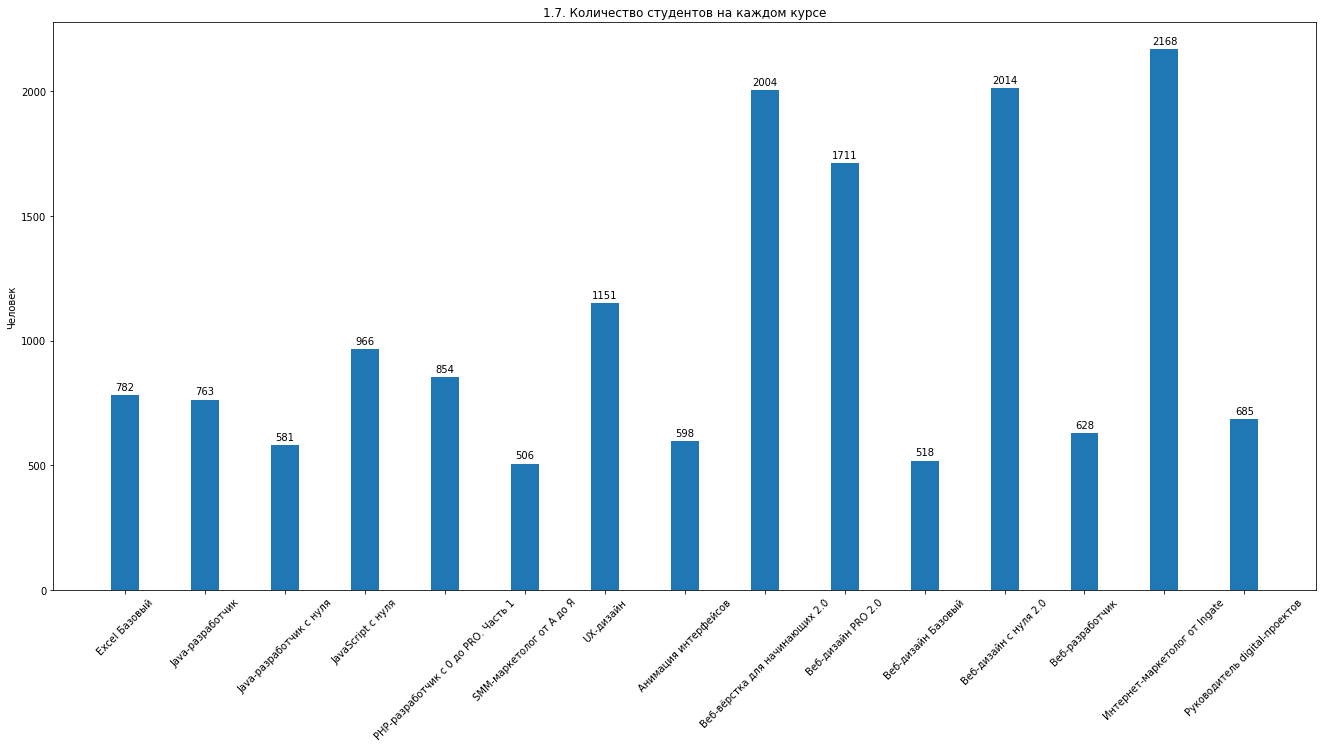

In [17]:
#Готовим данные
df= main_df[['course_title','student_id']].groupby('course_title').agg('nunique')

labels = df.index
values = df['student_id']

#Расположение подписей
x = np.arange(len(labels))
#Ширина столбцов
width = 0.35  

fig, ax = plt.subplots()
rects = ax.bar(x, values, width)
fig.set_size_inches(18.5, 10.5)

#Добавление подписей на график
ax.set_ylabel('Человек')
ax.set_title('1.7. Количество студентов на каждом курсе')
ax.set_xticks(x)
ax.set_xticklabels(labels)

#Разворачиваем подписи
plt.xticks(rotation=45)

#Устанавливаем подписи значений над каждым столбцом
for rect in rects:
    r_height = rect.get_height()
    ax.annotate('{}'.format(r_height),
    xy=(rect.get_x() + rect.get_width() / 2, r_height),
    xytext=(0, 3),
    textcoords="offset points",
    ha='center', va='bottom')

    
fig.tight_layout()

plt.show()


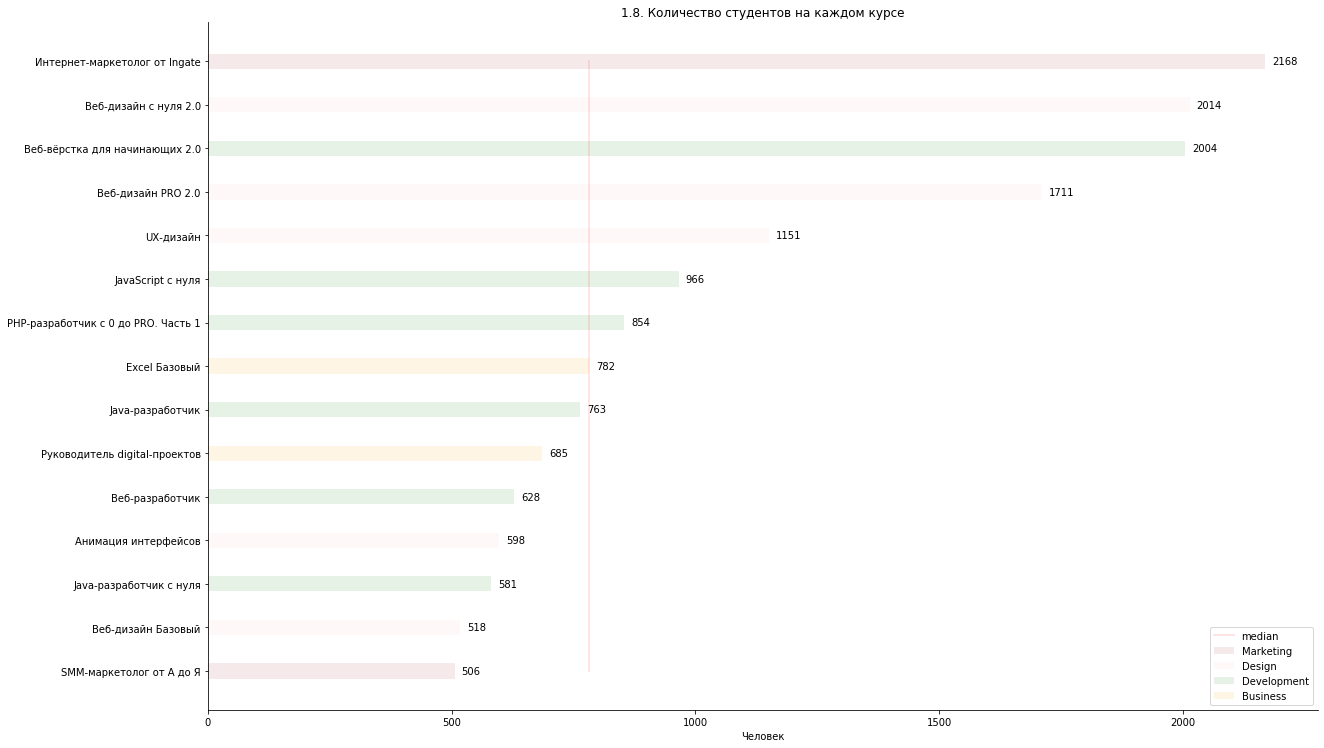

In [21]:
#Готовим данные
df= main_df[['course_title','course_field','student_id']].groupby(['course_title','course_field']).agg('nunique')
df= df.drop(['course_title', 'course_field'], axis=1)
df= df.sort_values('student_id')
df.reset_index(inplace=True)
#Вычисляем медианное количество студентов на всех курсах
med= df['student_id'].agg('median')

#Определяем список цветов, в зависимости от сферы курса
COLOR_LIST=['brown','pink', 'green', 'orange', 'blue', 'cyan','purple', 'red']

#Собираем словарь соответствия сферы курса и цвета
field_color_dict={}
course_colors=[]
index= 0
for item in df['course_field']:
    if not field_color_dict.get(item):
        field_color_dict[item]= COLOR_LIST[index]
        
        if index== COLOR_LIST.count:
            index= 0
            
        course_colors.append(COLOR_LIST[index])
        
        index= index + 1
    #if
    else:
        course_colors.append(field_color_dict.get(item))


#Строим график
labels = df['course_title']
values = df['student_id']

# Расположение подписей
x = np.arange(len(labels))
# Ширина столбцов
width = 0.35
# Прозрачность
alpha_level= 0.1

fig, ax = plt.subplots()

#Добавляем столбцы с количеством студентов на график
rects= ax.barh(x, values, width, color=course_colors, alpha= alpha_level)

#Добавляем фиктивные значения для получения легенды по сферам курсов
index= 0
for item in field_color_dict.items():
    ax.barh(index, 0, 0, color=item[1], label= item[0], alpha= alpha_level)
    index= index+1

#Добавляем медиану на график
ax.plot([med, med], [0, max(x)], linewidth=2, label= 'median', color='red', alpha= alpha_level)

# Добавление подписей на график
ax.set_xlabel('Человек')
ax.set_title('1.8. Количество студентов на каждом курсе')
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.legend()
               
#убираем лишние рамки
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#устанавливаем размер графика
fig.set_size_inches(18.5, 10.5)

#Устанавливаем подписи значений 
for rect in rects:
    r_width = rect.get_width()
    ax.annotate('{}'.format(r_width),
                xy=(r_width, rect.get_y() + rect.get_height() / 2),
                xytext=(7, 0),
                textcoords="offset points",
                ha='left', va='center')

    
fig.tight_layout()
plt.show()

## Заключение

Был проведен анализ **15** курсов учебной платформы.
Каждый курс разбивается на модули, в представленных курсах, количество модулей, варьируется от **8** до **21** (см. п. 1.2). В свою очередь, модули состоят из уроков (см. п 1.3). Медианное количество уроков в модуле на каждом курсе варьируется от **2** до **13** (см. п 1.3). 

Анализ возраста студентов показал, что необходимо ввести контроль заполнения даты рождения на платформе, т. к. при первичном расчете минимальный возраст студента составил **-7172** лет, а максимальный **2020** лет. После того, как были отфильтрованы значения от **10** до **90 лет**, максимальный возраст составил **89 лет**, а минимальный **11 лет**, что также говорит о некорректности исходных данных (см. пункт 1.5). Средний и медианный возраст студентов после фильтрации, практически, не изменился и составил **29** и **28 лет**.
Анализ возраста студентов на каждом курсе представлен в п. 1.6. Самый возрастной студент учится на курсе **«UX-дизайн» и ему 85 лет**. Самые молодые студенты, им всего по **13 лет**, выбрали курсы, связанные с **веб разработкой и дизайном**:
JavaScript с нуля, PHP-разработчик с 0 до PRO. Часть 1, 
Веб-вёрстка для начинающих 2.0
Веб-дизайн с нуля 2.0
Веб-разработчик

В п.1.7 и 1.8 представлены графики, отображающее количество студентов на каждом курсе. Из них видно, что самый популярный курс — **«Интернет-маркетолог от Ingate»**, его выбрало **2168 человек**, самый малочисленный курс, также связан с маркетингом **«SMM-маркетолог от А до Я»**, его выбрало всего **506 человек**. Медианное количество студентов на курсе составляет **782 человека**.

## 2. Расчет потенциальной нагрузки на преподавателей

### 2.1 Прирост студентов на каждом курсе по месяцам

In [22]:
#выберем нужные данные из основного датафрейма
df= main_df[['course_title','student_id','start_date', 'is_homework']][main_df['is_homework']].sort_values('start_date')

#отформатируем дату в 'yyyy-mm'
df['start_date']= df['start_date'].apply(lambda x: x[:7])

#сгруппируем по 'course_title', 'student_id' и выберем первый элемент в выборке
df= df.groupby(['course_title', 'student_id']).agg('first')
df.reset_index(inplace=True)

#посчитаем количестов студентов
df= df.groupby(['course_title', 'start_date']).agg('nunique')
#удалим лишние колонки
df= df.drop(['course_title', 'start_date', 'is_homework'], axis=1)

#Добавим месяцы с нулевым приростом
#Сформируем временную шкалу
courses_timeline = []
cur_year= 2016
cur_month= 3
while str(cur_year)+'-'+str(cur_month)!='2019-8':
    
    month= str(cur_month)
    if cur_month< 10:
        month= '0' + month
    
        
    courses_timeline.append(str(cur_year)+'-'+month)
    
    if cur_month== 12:
        cur_month= 1
        cur_year= cur_year + 1
    else:
        cur_month= cur_month +1
        
#while

#Определим месяцы для каждого курса, когда был нуливой прирост
prev_index= ('','')
zero_months= []
for index, row in df.iterrows():
    if prev_index== ('',''):
        prev_index= index
        
        continue
    #if
    
    prev_row= df.loc[prev_index]
    prev_index= index
    
    if prev_row.name[0]== row.name[0]:
        start_index= courses_timeline.index(prev_row.name[1])
        finish_index= courses_timeline.index(row.name[1])
        
        if finish_index - start_index> 1:
            while start_index< finish_index-1:
                start_index= start_index + 1
                zero_months.append((row.name[0], courses_timeline[start_index]))
                 
    #if    

        
#for
 
#Добавим нуливые месяцы в выборку
for item in zero_months:
    df.loc[item,:]= 0
    
df= df.sort_index()

print('Прирост студентов на каждом курсе по месяцам')

df

Прирост студентов на каждом курсе по месяцам


student_id
course_title                  start_date            
Excel Базовый                 2018-02            6.0
                              2018-03            3.0
                              2018-04            0.0
                              2018-05            3.0
                              2018-06            9.0
...                                              ...
Руководитель digital-проектов 2019-03           36.0
                              2019-04           17.0
                              2019-05           25.0
                              2019-06           15.0
                              2019-07           20.0

[294 rows x 1 columns]

2.2 Графики прироста студентов в каждом месяце для каждого курса (раздельно)


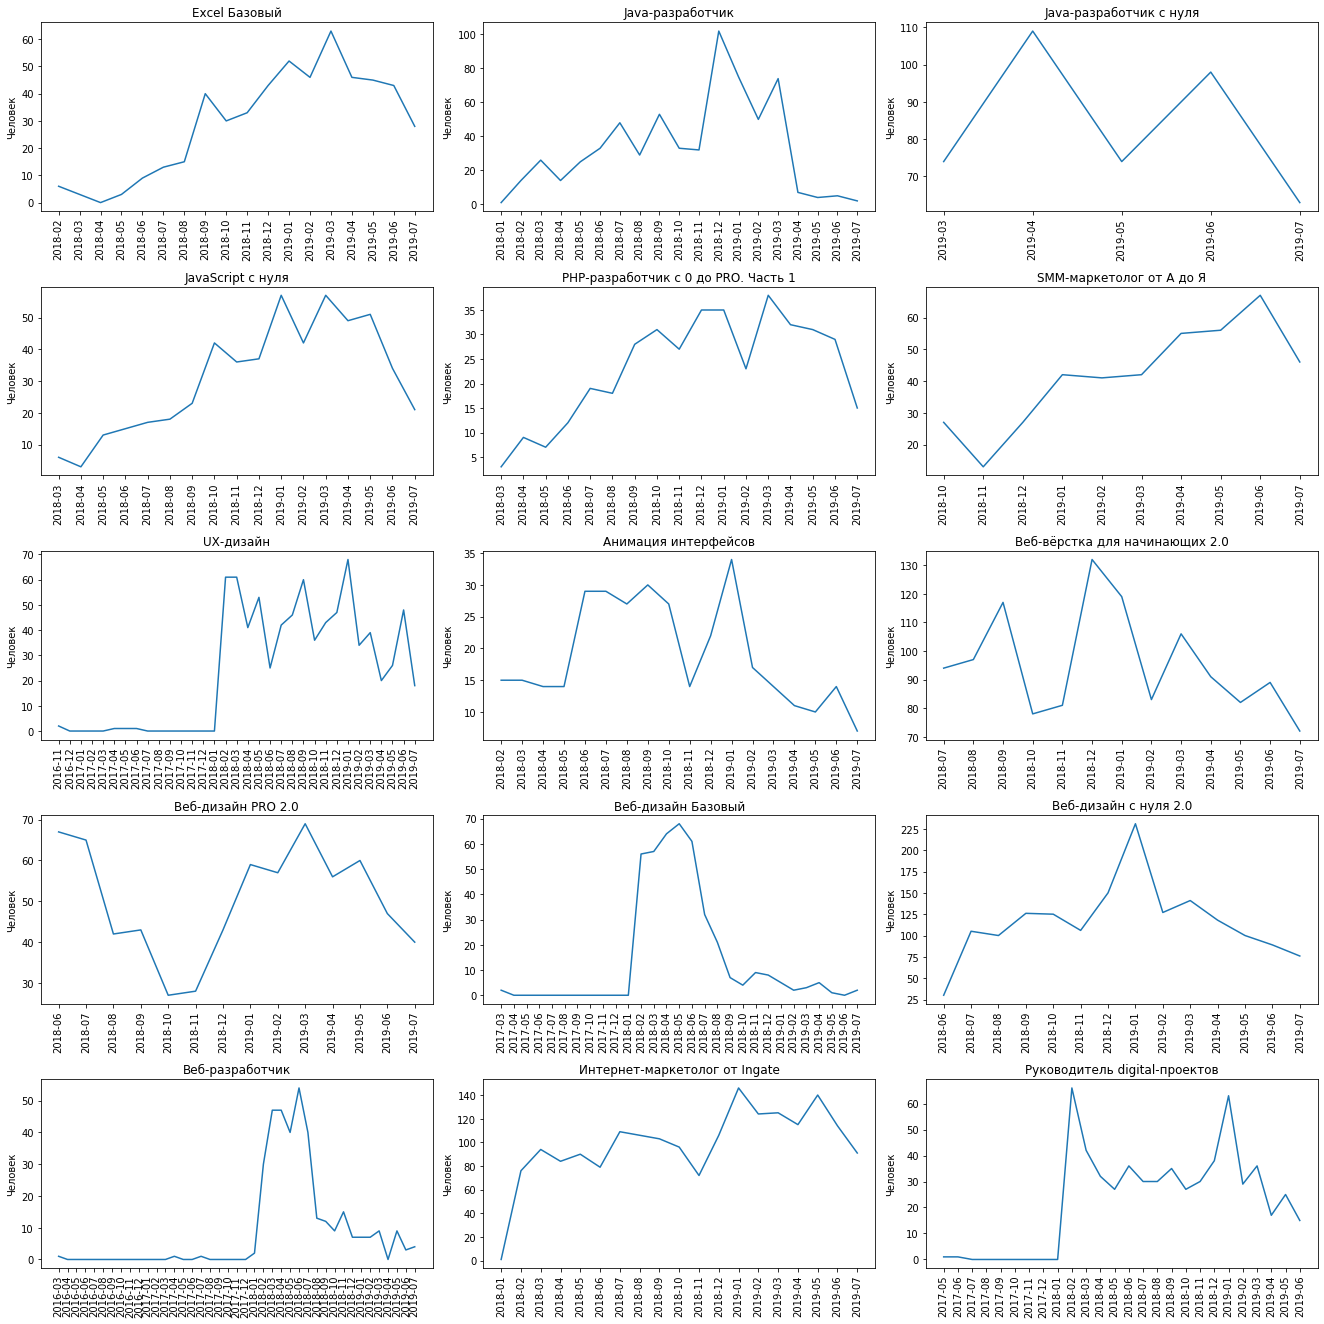

In [23]:
def plot_linegraph_type1 (p_df, p_ylabel='', p_show_xticklabels= True):
    '''Функция построения раздельных графиков, когда надо вывести на отдельных графиках метрики для каждого курса
    
    p_df [in] - датафрейм с исходными данными
    p_ylabel[in] - подпись оси y
    p_show_xticklabels[in] - true- отображать подписи значений на оси X, False - не отображать'''
    
    fig = plt.figure(tight_layout=True)

    #задаем размерность сетки для размещения графиков
    gs= fig.add_gridspec(5, 3)
    fig.set_size_inches(18.5, 18.5)

    course= ''
    x_labels= []
    y_values= []
    row_ind= col_ind= 0
    index= -1
    row_cnt= p_df.shape[0]
    for row in p_df.iterrows():
        index= index+1 
    
        if course!= row[0][0] or index== row_cnt-1:
    
            if len(y_values)> 0 and len(x_labels)> 0:     
            
                #Строим график
                ax = fig.add_subplot(gs[row_ind, col_ind])
                ax.plot(np.arange(len(x_labels)), y_values)
        
                #Добавление подписей на график
                ax.set_title(course)
                ax.set_ylabel(p_ylabel)
                ax.set_xticks(np.arange(len(x_labels)))
                
                if p_show_xticklabels:
                    ax.set_xticklabels(x_labels)
                    
                    #Разворачиваем подписи
                    plt.xticks(rotation=90)
                #if    
        
                x_labels.clear()
                y_values.clear()
        
                #Рассчитываем индекс графика в сетке
                if (col_ind== 2):
                    col_ind= 0
                    row_ind= row_ind + 1
                #if
                else:
                    col_ind= col_ind + 1
        
            #if
        
        course= row[0][0]
        x_labels.append(row[0][1])
        y_values.append(row[1][0])

    #for


    fig.align_labels()
    plt.show()

#plot_linegraph_type1

print ('2.2 Графики прироста студентов в каждом месяце для каждого курса (раздельно)')
plot_linegraph_type1 (df, 'Человек')

2.3 Графики прироста студентов в каждом месяце для каждого курса (вместе)


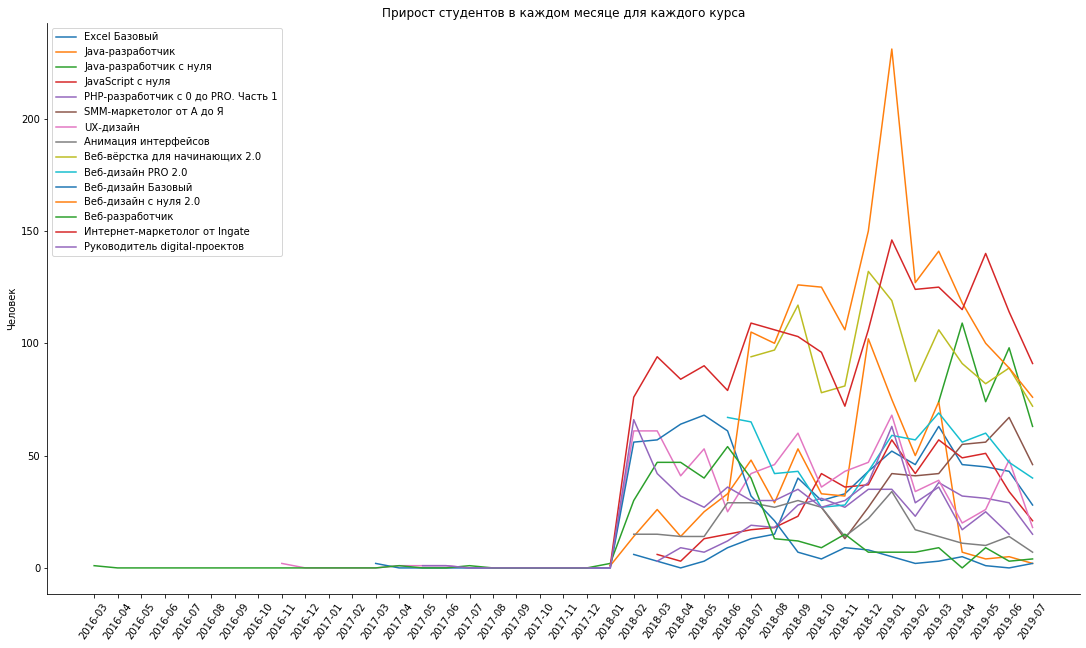

In [24]:
def plot_linegraph_type2 (p_df, p_graph_title, p_ylabel='', p_xticklabels=[]):
    '''Функция построения единого графика, когда надо вывести на одном графике все метрики для каждого курса
    
    p_df [in] - датафрейм с исходными данными
    p_graph_title [in] - название графика
    p_ylabel[in] - подпись оси y
    p_xticklabels[in] - подпись оси x'''
    
    #Подготовим данные - необходимо собрать все даты и сформировать шкалу значений по оси x (месяцы)
    total_months = []
    for row in p_df.iterrows():
        total_months.append(row[0][1])
    
    #Удаляем дубли месяцев из списка и сортируем
    total_months = list(dict.fromkeys(total_months))
    total_months.sort()

    fig, ax = plt.subplots()

    fig.set_size_inches(18.5, 10.5)

    course= ''
    months= []
    y_values= []
    index= -1
    row_cnt= p_df.shape[0]
    for row in p_df.iterrows():
        index= index+1
    
        if course!= row[0][0] or index== row_cnt-1:
            
            if len(y_values)> 0 and len(months)> 0:
                
                #Определяем значения на общей шкале
                x_values= []
                for item in months:
                    x_values.append(total_months.index(item))
                
                #Строим график
                ax.plot(x_values, y_values, label= course)
        
                months.clear()
                y_values.clear()
            #if 
    
        course= row[0][0]
        months.append(row[0][1])
        y_values.append(row[1][0])

    #for

    #Добавляем подписи на график
    ax.set_title(p_graph_title)
    ax.set_ylabel(p_ylabel)
    ax.set_xticks(np.arange(len(total_months)))
    
    if len( p_xticklabels)==0:
        ax.set_xticklabels(total_months)
    else:
        ax.set_xticklabels(p_xticklabels)
        
    #Разворачиваем подписи
    plt.xticks(rotation=55)

    ax.legend()
    #убираем лишние рамки
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
        
    
    fig.align_labels()
    plt.show()

#plot_linegraph_type2
    
print ('2.3 Графики прироста студентов в каждом месяце для каждого курса (вместе)')
plot_linegraph_type2(df, 'Прирост студентов в каждом месяце для каждого курса', 'Человек')

In [25]:
#выберем нужные данные из основного датафрейма
df_temp= main_df[['course_title','progress_id','start_date', 'finish_date', 'is_homework', 'status']][main_df['is_homework']].sort_values(['course_title','progress_id','start_date'])

#отформатируем даты в 'yyyy-mm'
df_temp['start_date']= df_temp['start_date'].apply(lambda x: x[:7])
df_temp= df_temp.rename(columns={'start_date':'progress_date'}) 

#добавим в результат все невыполненные домашние задания, т.к. будем считать, что они не переходят из месяца в месяц
df= pd.DataFrame(columns=['course_title', 'progress_id', 'progress_date'])
df= df.append(df_temp[['course_title','progress_id','progress_date']][df_temp['status']!='done'], ignore_index=True)

#оставим только выполненные домашние задания, чтобы рассчитать месяцы, в которых они выполнялись
df_temp= df_temp[df_temp['status']=='done']
df_temp['finish_date']= df_temp['finish_date'].apply(lambda x: x[:7])

#соберем сдоварь строк для добавления в dataframe, 
#т.к. если добабалять напрямую в DF, то работать будет очень долго!!!
add_rows= {}
index= 0
for row in df_temp.iterrows():
    if row[1][2]==row[1][3]:
        add_rows[index]= {'course_title': row[1][0], 
                          'progress_id': row[1][1], 
                          'progress_date': row[1][2]}
        
        index= index+1
        continue
    #if 
    
    start_index= courses_timeline.index(row[1][2])
    finish_index= courses_timeline.index(row[1][3])
    
    while start_index<= finish_index:
        
        add_rows[index]= {'course_title': row[1][0], 
                       'progress_id': row[1][1], 
                       'progress_date': courses_timeline[start_index]} 
        index= index+1
        start_index= start_index+1
    #while    
        
#for

df_temp= pd.DataFrame.from_dict(add_rows, "index")

df= df.append(df_temp, ignore_index=True)
df= df.sort_values(['course_title','progress_date'])

df= df.groupby(['course_title', 'progress_date']).agg('count')

print ('2.4 Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю')
df.to_excel('data/courses_progress.xls')
df

2.4 Количество прогрессов по выполнению домашних работ в каждом месяце за всю историю


progress_id
course_title                  progress_date             
Excel Базовый                 2018-02                 37
                              2018-03                  7
                              2018-04                 13
                              2018-05                 17
                              2018-06                 37
...                                                  ...
Руководитель digital-проектов 2019-03                385
                              2019-04                284
                              2019-05                291
                              2019-06                231
                              2019-07                174

[258 rows x 1 columns]

2.5 Графики количества прогрессов по выполнению домашних работ в каждом месяце (раздельно)


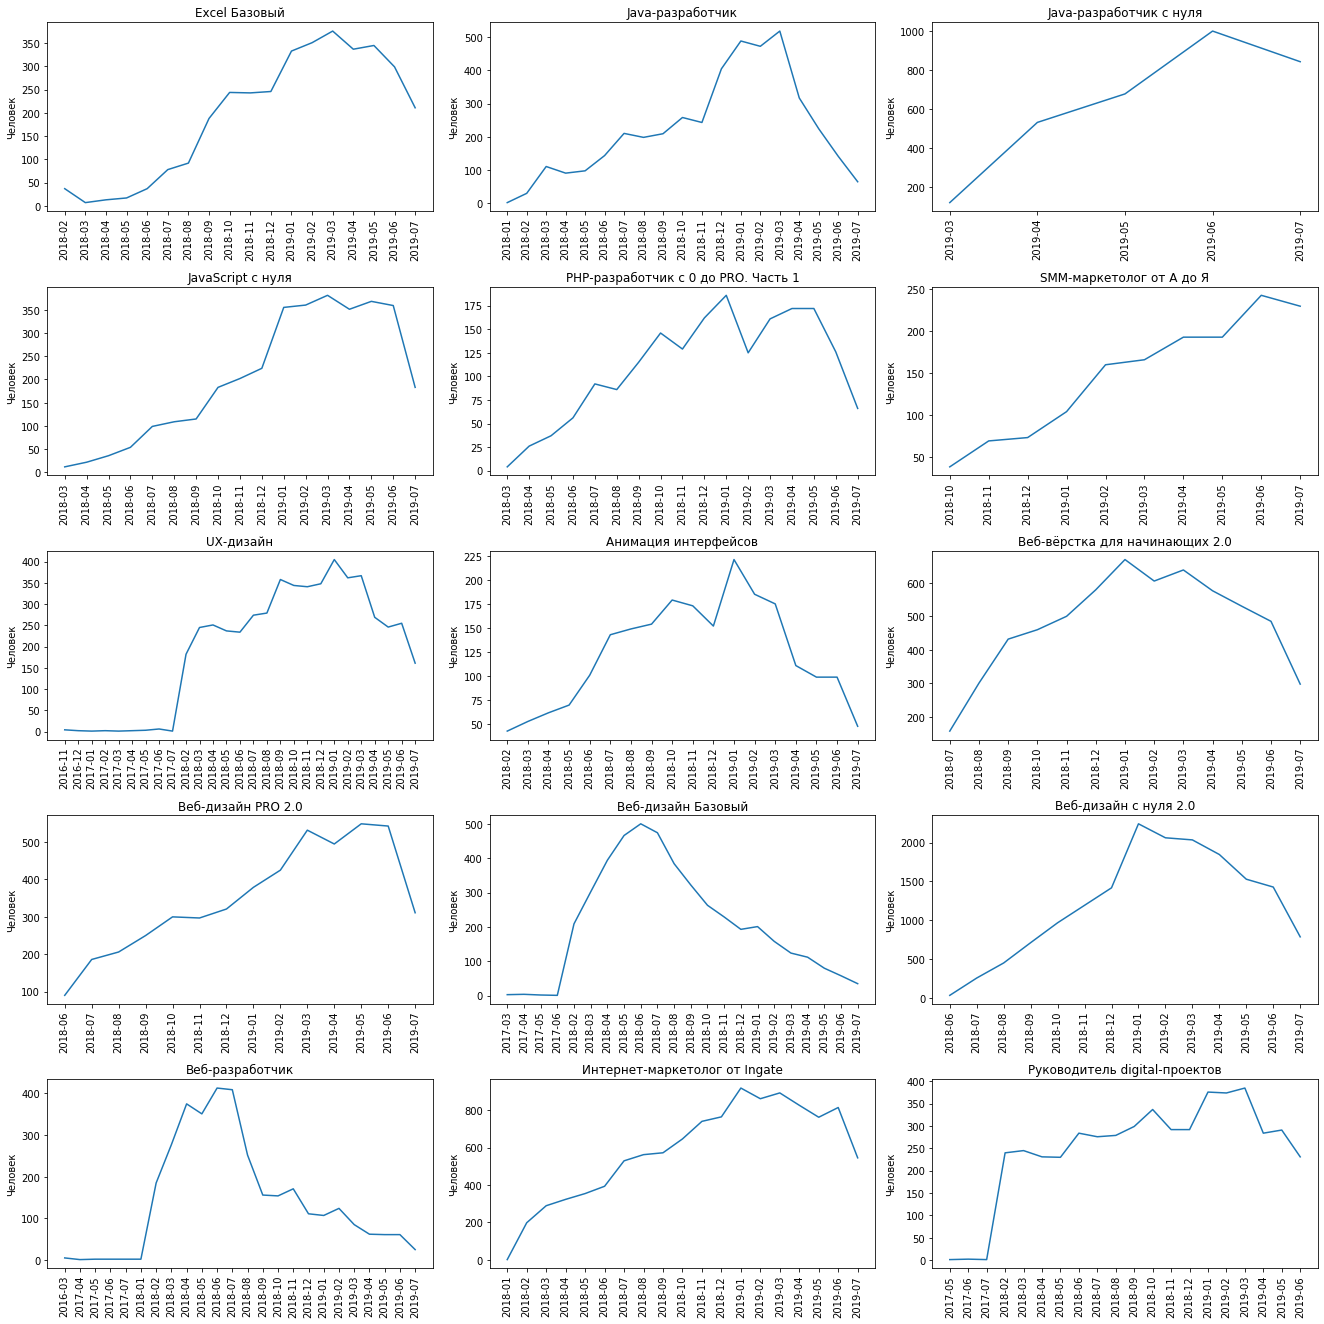

In [26]:
print ('2.5 Графики количества прогрессов по выполнению домашних работ в каждом месяце (раздельно)')

plot_linegraph_type1 (df, 'Человек')

2.6 График количества прогрессов по выполнению домашних работ в каждом месяце (вместе)


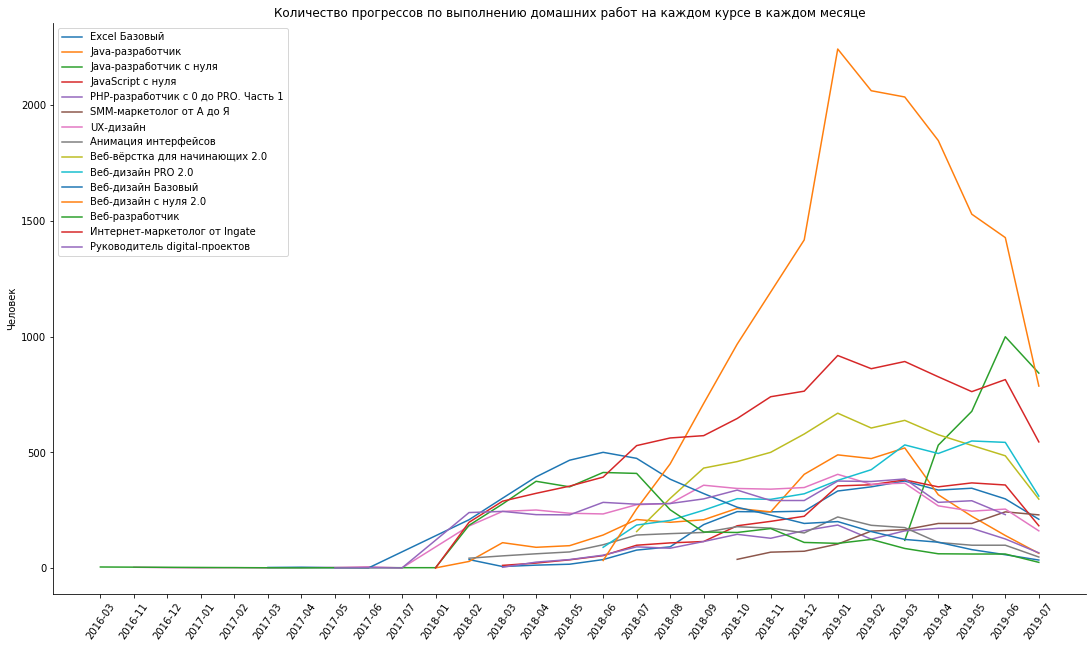

In [27]:
print ('2.6 График количества прогрессов по выполнению домашних работ в каждом месяце (вместе)')

plot_linegraph_type2(df, 'Количество прогрессов по выполнению домашних работ на каждом курсе в каждом месяце', 'Человек')

## Заключение

В данном разделе проведен анализ метрик, позволяющих ценить нагрузку на преподавателей платформы.
В п. 2.1. приведен расчет прироста студентов на каждом курсе по месяцам. В п.2.2 приведены графики прироста студентов по месяцам отдельно по каждому курсу:

 * **Excel Базовый** — количество студентов увеличивалось практически равномерно и достигло максимума  в 3.2019 - 63 человека
 * **Java-разработчик** — наблюдается 2 пика прироста 12.2018 — 102 и 3.2019 - 74
 * **Java-разработчик c нуля** — прирост неравномерный с 2-мя пиками 4.2019 — 108 и 6.2019 — 98 человек
 * **JavaScript с нуля** — наблюдается устойчивый прирост с пиком 1.2019 — 57 человек, а с 3.2019 идет спад
 * **PHP-разработчик с 0 до PRO. Часть 1** — наблюдается рост студентов до пика 3.2019 — 38 человек, далее идет спад
 * **SMM-маркетолог от А до Я** — наблюдается, практически, равномерный прирост студентов c пиком 2019.06 - 67 человек.
 * **UX-дизайн** — с 11.2016 по 1.2018 отдельные единичные случаи прироста, можно считать что прироста нет, резкий прирост 2.2018 - 61 селовек, далее прирост студентов неравномерный, нет явных пиков.
 * **Анимация интерфейсов** — можно выделить 2 пика 9.2018 - 30 человек и 1.2019 - 34 человека
 * **Веб-вёрстка для начинающих 2.0** — характер прироста студентов неравномерный, можно выделить 3 локальных максимума 9.2018 — 117 человек, 12.2018 — 132 человека и 3.2019 — 106 человек 
 * **Веб-дизайн PRO 2.0** — с начала курса до 11.2018 идет сильный спад прироста студентов, дальше начинается такой же резкий подъем до пика 3.2019 — 69 человек 
 * **Веб-дизайн Базовый** — с 3.2017 по 1.2018 отдельные единичные случаи прироста, можно считать что прироста нет, резкий прирост 2.2018 - 56 человек, далее рост до  5.2018 — 68 человек, потом идет спад
 * **Веб-дизайн с нуля 2.0** — рост с начала курса до пика 1.2019 - 231 человек, после которого идет спад
 * **Веб-разработчик** — с 3.2016 по 1.2018 отдельные единичные случаи прироста, можно считать что прироста нет, резкий прирост 2.2018 - 30 человек, далее идет рост до 6.2018 — 54 человека, потом идет спад
 * **Интернет-маркетолог от Ingate** — наблюдается рост с пиком 2019-01 — 146 человека
 * **Руководитель digital-проектов** — с 5.2017 по 1.2018 отдельные единичные случаи прироста, можно считать что прироста нет, резкий прирост 2.2018 - 66 человек, далее идет неравномерный прирост, можно еще выделить пик  2019.01 — 63 человека

В п.2.3 прирост студентов для разных курсов представлен на одном графике, из которого видно, что наибольший прирост относительно других курсов наблюдается на курсе **«Веб-дизайн с нуля 2.0»**.
В п. 2.4 приведена таблица с расчетом количества прогрессов выполнения домашних заданий по каждому курсу по месяцам. В п. 2.5 приведены графики прогрессов выполнения домашних заданий отдельно по каждому курсу:
 * **Excel Базовый** — устойчивый рост с пиком 3.2019 — 376 прогресса
 * **Java-разработчик** — устойчивый рост до пика 3.2019 — 489 прогресса далее спад
 * **Java-разработчик c нуля** — практически, линейный рост до 6.2019 — 999 прогрессов
 * **JavaScript с нуля** — устойчивый рост до пика 6.2019 — 381 прогресс
 * **PHP-разработчик с 0 до PRO. Часть 1** — неравномерный рост с 2-мя локальными пиками 1.2019 — 186 и 5.2019 — 172 прогрессов
 * **SMM-маркетолог от А до Я** — практически, линейный рост до 6.2019 — 243 прогресса
 * **UX-дизайн** — с 11.2016 по 7.2017 отдельные единичные случаи прогрессов, далее неравномерный рост до 1.2019 — 405  прогрессов, потом спад
 * **Анимация интерфейсов** — рост до пика 1.2019 — 221 прогресса, далее спад
 * **Веб-вёрстка для начинающих 2.0** — активный рост до 1.2019 — 669 прогрессов
 * **Веб-дизайн PRO 2.0** — практически, линейный, рост до 5.2019 — 549 прогрессов
 * **Веб-дизайн Базовый** — с 3.2017 по 6.2017 отдельные единичные случаи прогрессов, далее устойчивый рост до 6.2018 — 500 прогрессов, потом спад
 * **Веб-дизайн с нуля 2.0** — устойчивый рост до пика 2.2019 — 2061, далее спад
 * **Веб-разработчик** — с 3.2016 по 1.2018 отдельные единичные случаи прогрессов, далее рост до пика 7.2018 — 409 прогрессов, далее спад 
 * **Интернет-маркетолог от Ingate** — устойчивый рост до 1.2019 — 918 прогресса
 * **Руководитель digital-проектов** — с 5.2017 по 5.2017 отдельные единичные случаи прогрессов, далее  неравномерный рост 3.2019 — 685 прогресса

В п.2.6 прогрессы выполнения домашних заданий для разных курсов представлены на одном графике, из которого видно, что наибольшее количество прогрессов по выполнению домашних заданий относительно других курсов наблюдается на курсе **«Веб-дизайн с нуля 2.0»**.

Отдельно стоит выделить курсы **UX-дизайн**, **Веб-дизайн Базовый**, **Веб-разработчик** и **Руководитель digital-проектов**, в которых наблидается низкая активность на начальных отрезках, можно предположить что это ранние эксперементальные запуски курсов на платформе. Точки резкого прироста на вышеуказанных курсах могут говорить о полноценных запусков данных курсов.

## 3. Выявление проблемных модулей

In [28]:
from datetime import datetime as dt

#выберем нужные данные из основного датафрейма
df= main_df[['course_title','module_title','progress_id','start_date', 'finish_date']][(main_df['is_homework'])&(main_df['status']=='done')].sort_values(['course_title', 'module_title','progress_id'])

#найдем минимальное и максимальное время старта и финиша, 
#чтобы затем рассчитать время выполнения и для модулей с несколькими ДЗ
df= df.groupby(['course_title','module_title','progress_id']).agg(['min','max'])

#рассчитаем время выполнения в часах
def calc_runtime_days (p_start, p_finish):
    '''Рассчет времени в часах между p_start и p_finish'''
    
    delta= dt.strptime(p_finish[:19], '%Y-%m-%d %H:%M:%S') - dt.strptime(p_start[:19], '%Y-%m-%d %H:%M:%S')
    return delta.days + delta.seconds/86400 
    
#calc_runtime_days

df['run_time_d']= df.loc[:,[('finish_date', 'max'), ('start_date', 'min')]].apply((lambda x: (calc_runtime_days(x[1], x[0]))), axis=1)

df.reset_index(inplace=True)
df= df[['course_title','module_title', 'run_time_d']] 

df=  df.groupby(['course_title','module_title']).agg(['min','max','mean','median'])

print('3.1  Минимальное, максимальное, среднее, медианное время прохождения каждого модуля для каждого курса.')

df

3.1  Минимальное, максимальное, среднее, медианное время прохождения каждого модуля для каждого курса.


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


run_time_d  \
                                                                                              
                                                                                        min   
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                                0.0   
                              Основной функционал Excel                                 0.0   
                              Основной функционал Excel (продолжение)                   0.0   
                              Сводные таблицы Excel                                     0.0   
                              Формулы и функции Excel. Более сложные формулы            0.0   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                         0.0   
                              Требовательность digital-продюсера                        0.0   
                              Управление временем                                       0.0   
                              Управление дизайнерами. Разработка дизайна по s...        0.0   
                              Экологичный путь менеджера                                0.0   

                                                                                              \
                                                                                               
                                                                                         max   
course_title                  module_title                                                     
Excel Базовый                  Визуализация данных Excel                          174.839491   
                              Основной функционал Excel                           183.748519   
                              Основной функционал Excel (продолжение)             184.269317   
                              Сводные таблицы Excel                               239.226354   
                              Формулы и функции Excel. Более сложные формулы      175.549178   
...                                                                                      ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   211.568171   
                              Требовательность digital-продюсера                  396.529005   
                              Управление временем                                 163.682500   
                              Управление дизайнерами. Разработка дизайна по s...  199.136053   
                              Экологичный путь менеджера                          245.586493   

                                                                                             \
                                                                                              
                                                                                       mean   
course_title                  module_title                                                    
Excel Базовый                  Визуализация данных Excel                           9.925482   
                              Основной функционал Excel                            5.991599   
                              Основной функционал Excel (продолжение)              4.306042   
                              Сводные таблицы Excel                                9.482788   
                              Формулы и функции Excel. Более сложные формулы       7.344225   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   21.258898   
                              Требовательность digital-продюсера                  17.546467   
                              Управление временем                         

3.2 Графики прохождения каждого модуля для каждого курса (медианное время)


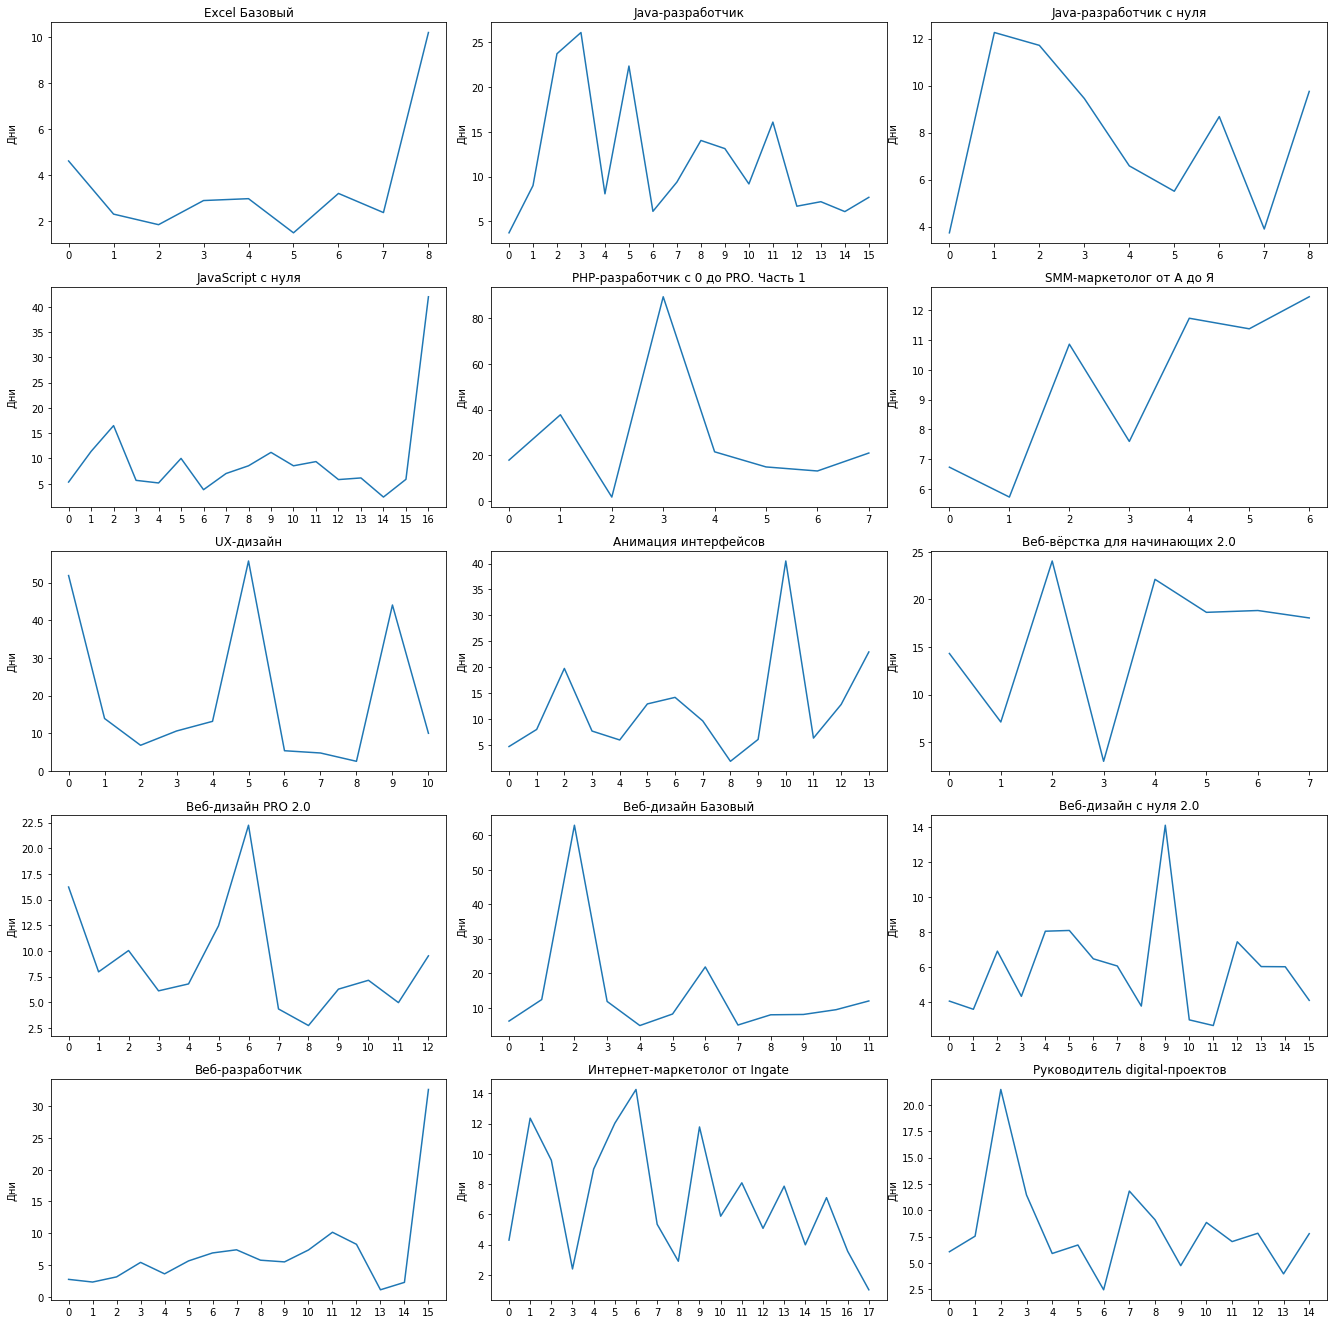

In [29]:
#Подготовим данные
df['median']= df[('run_time_d', '', 'median')]
df= df.drop('run_time_d', axis= 1)

print ('3.2 Графики прохождения каждого модуля для каждого курса (медианное время)')

plot_linegraph_type1 (df, 'Дни', False)

In [30]:
#выберем нужные данные из основного датафрейма
df= main_df[['course_title','start_date', 'finish_date']][(main_df['is_homework'])&(main_df['status']=='done')].sort_values(['course_title'])

#определим месяц выполнения домашней работы
df['start_month']= df['start_date'].apply(lambda x: int(x[5:7]))

#расчитаем время выполнения домашнего задания
df['run_time_d']= df.loc[:,['finish_date', 'start_date']].apply((lambda x: (calc_runtime_days(x[1], x[0]))), axis=1)

df= df[['course_title', 'start_month', 'run_time_d']].sort_values(['course_title', 'start_month'])
df= df.groupby(['course_title', 'start_month']).agg('median')


print ('3.3 Медианное время выполнения домашних работ по месяцам для каждого курса')

df

3.3 Медианное время выполнения домашних работ по месяцам для каждого курса


run_time_d
course_title                  start_month            
Excel Базовый                 1              2.219219
                              2              2.240741
                              3              2.828461
                              4              1.940093
                              5              2.413380
...                                               ...
Руководитель digital-проектов 8             13.561007
                              9             10.109120
                              10             4.849653
                              11             6.003941
                              12             7.937650

[171 rows x 1 columns]

3.4 График выполнения домашних работ по месяцам для каждого курса (медианное время)


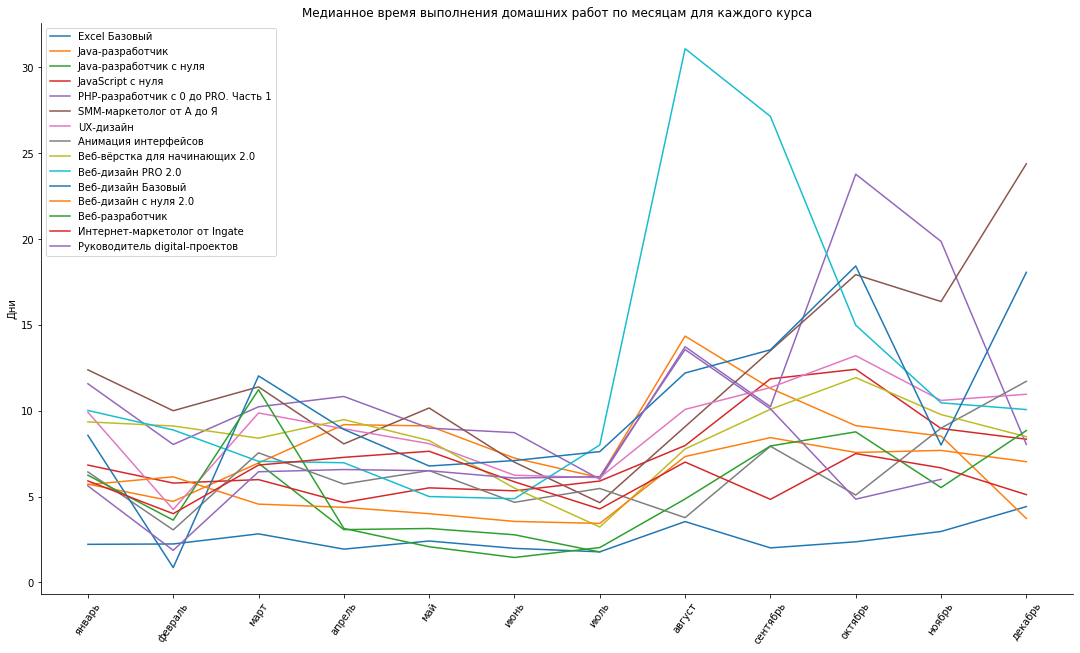

In [31]:
print ('3.4 График выполнения домашних работ по месяцам для каждого курса (медианное время)')

months= ['январь','февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
plot_linegraph_type2 (df, 'Медианное время выполнения домашних работ по месяцам для каждого курса', 'Дни', months)

## Заключение

В данном разделе было проанализировано время выполнения студентами домашних заданий по каждому модулю каждого курса. Были рассчитаны минимальное, максимальное, среднее и медианное время прохождение каждого модуля (см. п. 3.1). По результатам анализа раздела большинство минимальных значений прохождения курса равно нулю, что  требует проверки механизмов/методик ведения времени выполнения домашних заданий. Также стоит отметить, что среднее время прохождение модулей 2-3 раза превышает медианное значение, из чего можно сделать заключение, что есть много точек «случайного выброса», с большим временем выполнения домашних заданий, т. е. Есть ряд студентов, которые сильно отстают от основной группы.

В  п. 3.2 Представлены графики медианного прохождения модулей по каждому курсу. По результатам анализа графиков, можно выделить следующие закономерности:
 * **Excel Базовый, Java-разработчик c нуля, Веб-разработчик** — равномерное значение времени выполнения заданий в течении всех модулей и большое/сложное задание в конце курса, требующее в разы больше времени на его выполнение, чем предыдущее задания.
 * **PHP-разработчик с 0 до PRO. Часть 1, Анимация интерфейсов, Веб-дизайн PRO 2.0, Веб-дизайн Базовый, Веб-дизайн с нуля 2.0, Руководитель digital-проектов** — в данных курсах просматривается по одному модулю, который вызвал у студентов наибольшие сложности относительно остальных

У остальных курсов сложно выявить какие-то закономерности из данных графиков.

В п.3.3 представлен расчет медианного времени выполнения курсов по месяцам, с целью определения сезонного эффекта. На графиках, построенных по результатам данного расчета (см. п. 3.4) видно, что время выполнения домашних заданий, приходящихся на второю половину года (с июля по декабрь), превышает время выполнения домашних заданий в первой половине года. Можно предположить, что увеличение времени выполнения домашних заданий связано с сезоном отпусков, а также увеличению рабочей нагрузки, которая возрастает к концу года.

## 4. Расчет конверсии перехода студентов из одного модуля в другой на каждом курсе

In [32]:
#альтернативный вариант
#получим начатые дз
df_hw= main_df[['course_title','module_number', 'lesson_number', 'student_id']][main_df['is_homework']].sort_values(['course_title', 'module_number', 'lesson_number'])

#оставим только первые домашние задания
df_hw= df_hw.groupby(['course_title','module_number', 'student_id']).agg('first')
df_hw.reset_index(inplace=True)

df_hw= df_hw[['course_title','module_number', 'student_id']]
df_hw= df_hw.groupby(['course_title','module_number']).agg('nunique')

#df_hw
#получим выполненные ДЗ
df_hw_done= main_df[['course_title','module_number', 'lesson_number', 'student_id']][(main_df['is_homework'])&(main_df['status']=='done')].sort_values(['course_title', 'module_number', 'lesson_number'])

#оставим только последние домашние задания
df_hw_done= df_hw_done.groupby(['course_title','module_number', 'student_id']).agg('last')
df_hw_done.reset_index(inplace=True)

df_hw_done= df_hw_done[['course_title','module_number', 'student_id']]
df_hw_done= df_hw_done.groupby(['course_title','module_number']).agg('nunique')

add_rows= {}
index= 0
for row in df_hw_done.iterrows():
    try:
        module_number= row[0][1]+1
        row_hw= df_hw.loc[(row[0][0], module_number)]
        
        add_rows[index]= {'course_title': row[0][0], 
                          'module_number': module_number,
                          'module_title': main_df['module_title'][(main_df['course_title']==row[0][0])&(main_df['module_number']==module_number)].iloc[:1].values[0],
                          'course_field': main_df['course_field'][main_df['course_title']==row[0][0]].iloc[:1].values[0],
                        'conversion': row_hw[2]/row[1][2]}
        index= index + 1
    
    #Если индекс не найден, то идем дальше
    except TypeError:
        continue    
    
#for
df_conv= pd.DataFrame.from_dict(add_rows, "index")

print ('4.1 Расчет конверсии перехода студентов из одного модуля в другой на каждом курсе')

df_conv.head(50)

4.1 Расчет конверсии перехода студентов из одного модуля в другой на каждом курсе


,course_title,module_number,module_title,course_field,conversion
0,Excel Базовый,2,Основной функционал Excel (продолжение),Business,0.947598
1,Excel Базовый,3,Формулы и функции Excel. Введение,Business,0.980296
2,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,Business,0.891473
3,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,Business,0.983498
4,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",Business,0.974074
5,Excel Базовый,7,Визуализация данных Excel,Business,0.983471
6,Excel Базовый,8,Сводные таблицы Excel,Business,1.010000
7,Excel Базовый,9,Экзаменационная работа,Business,1.026882
8,Java-разработчик,2,Синтаксис языка,Development,0.925400
9,Java-разработчик,3,Объекты и классы,Development,0.875878


4.2 Графики конверсии переходов студентов между модулями на каждом курсе


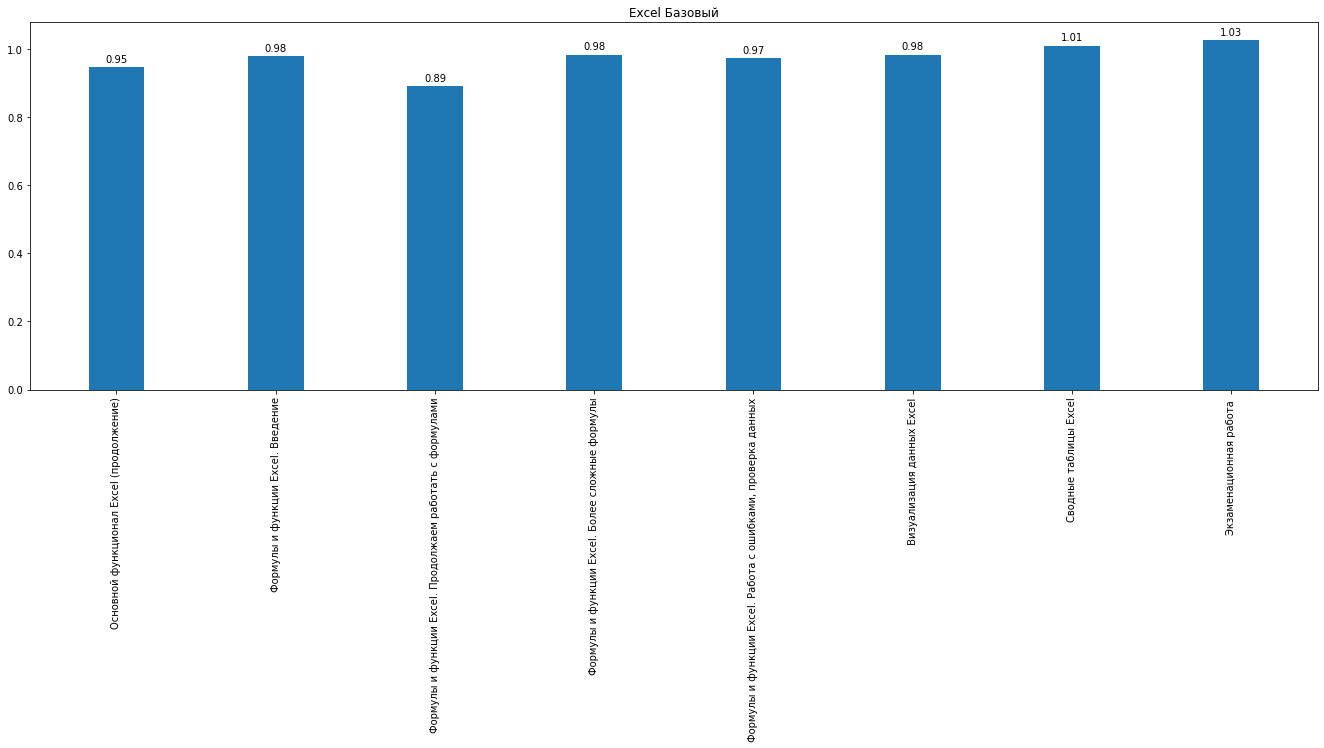

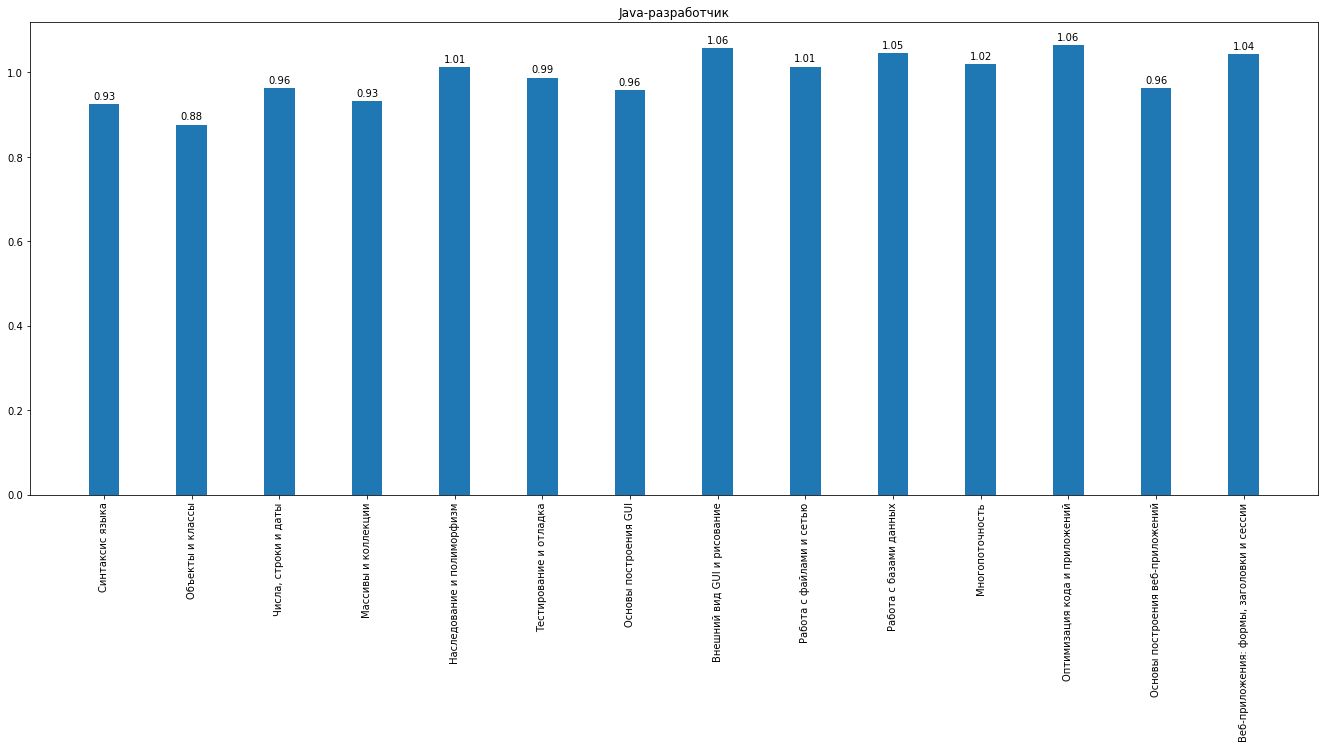

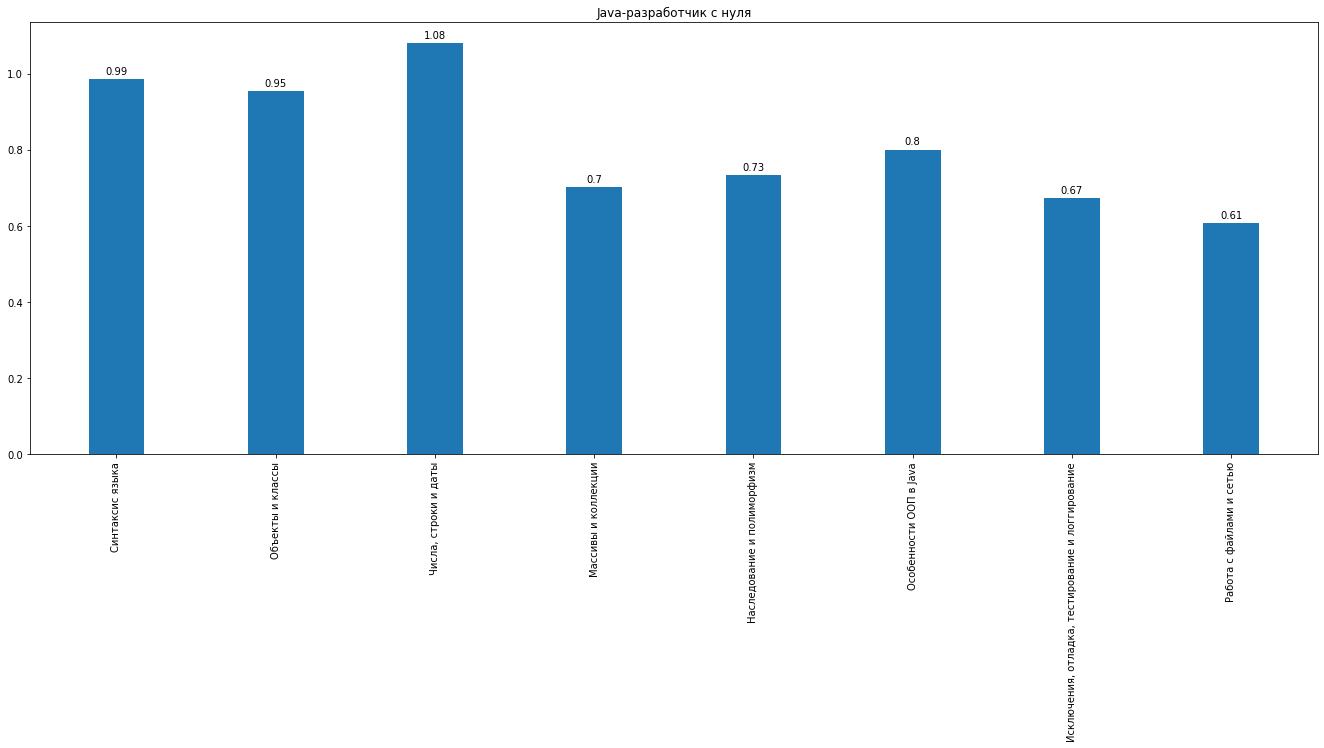

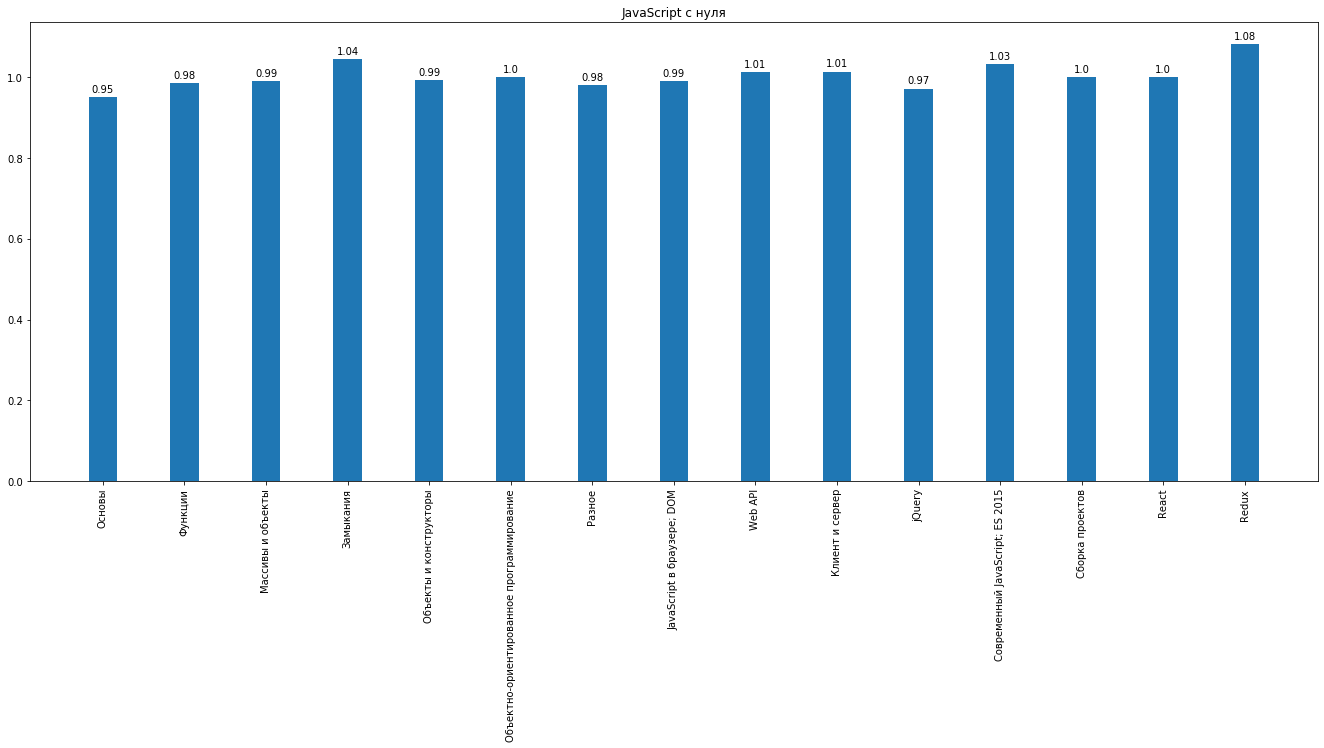

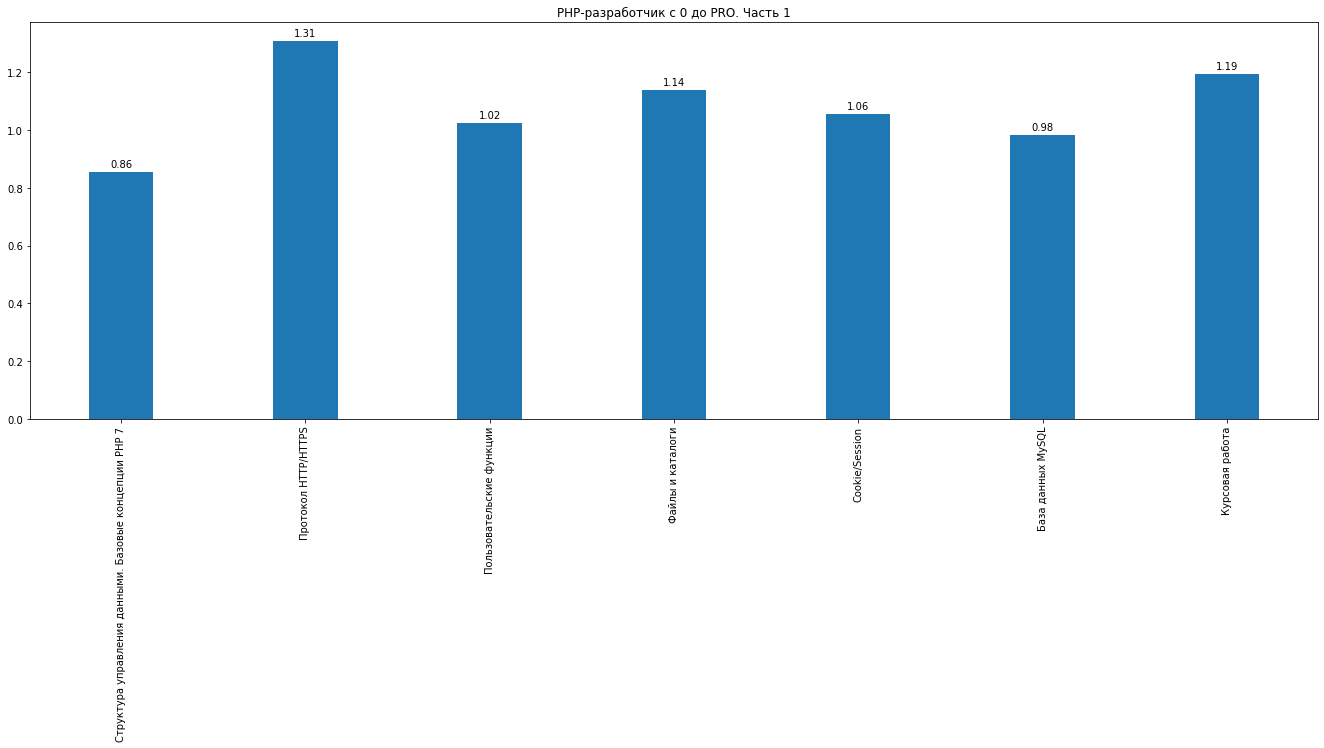

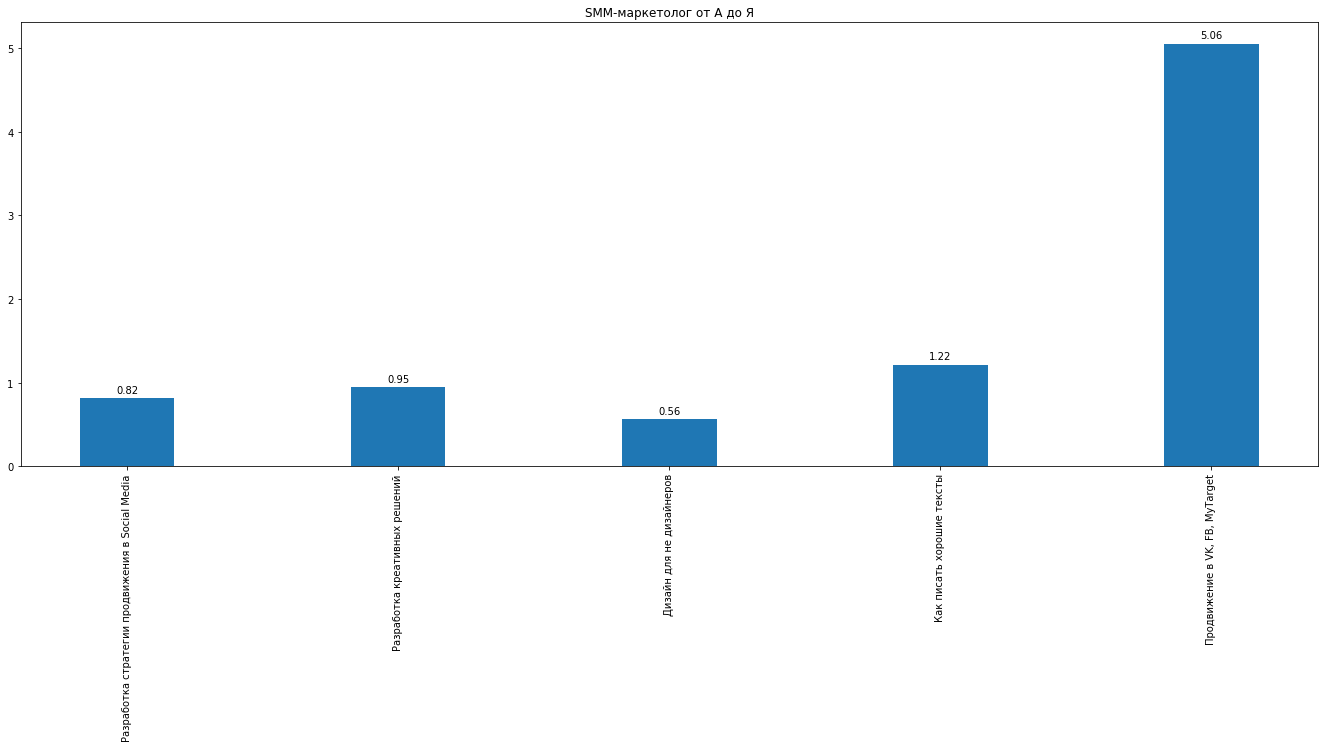

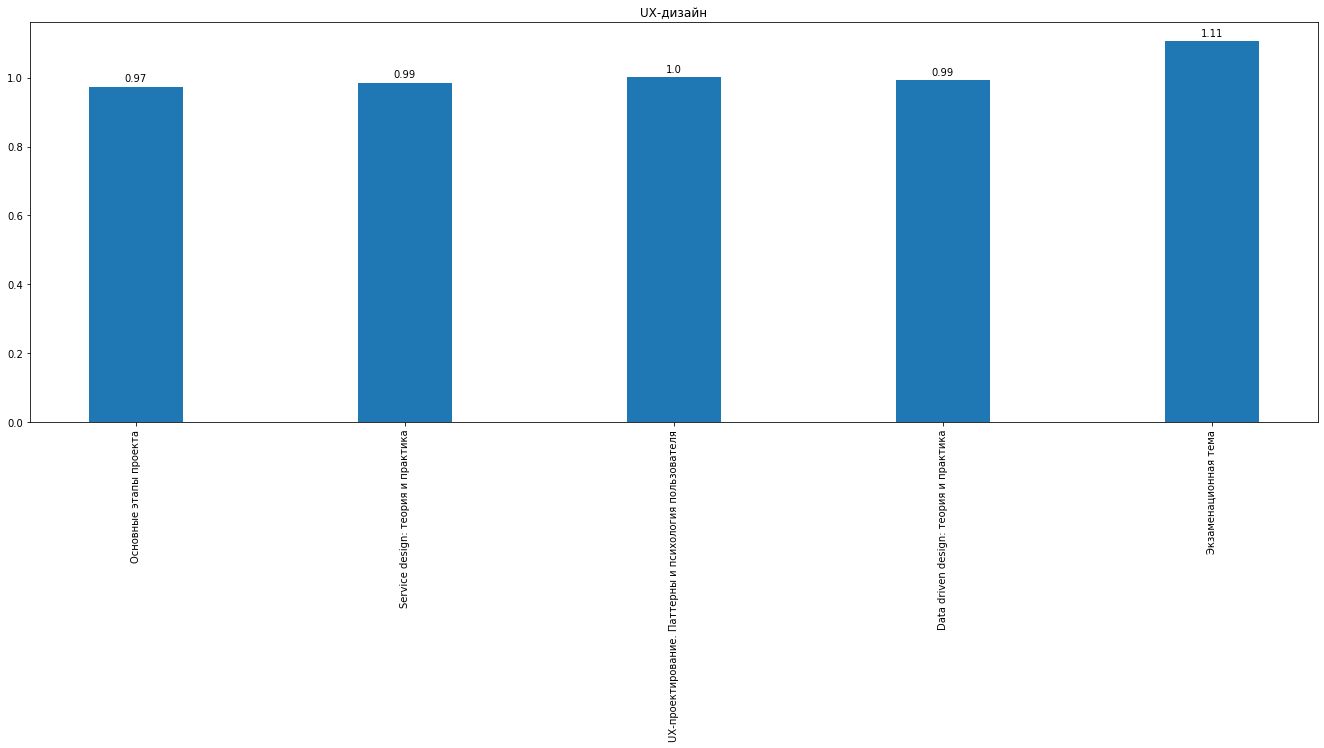

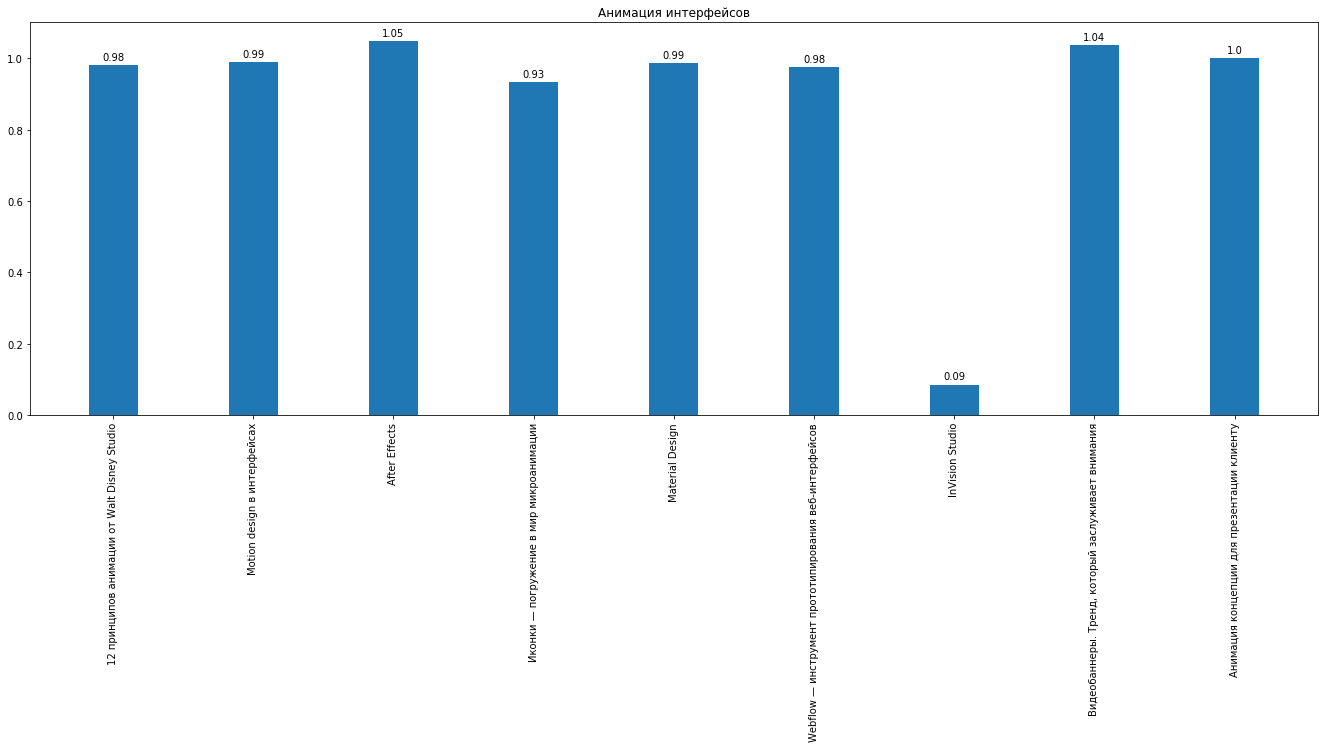

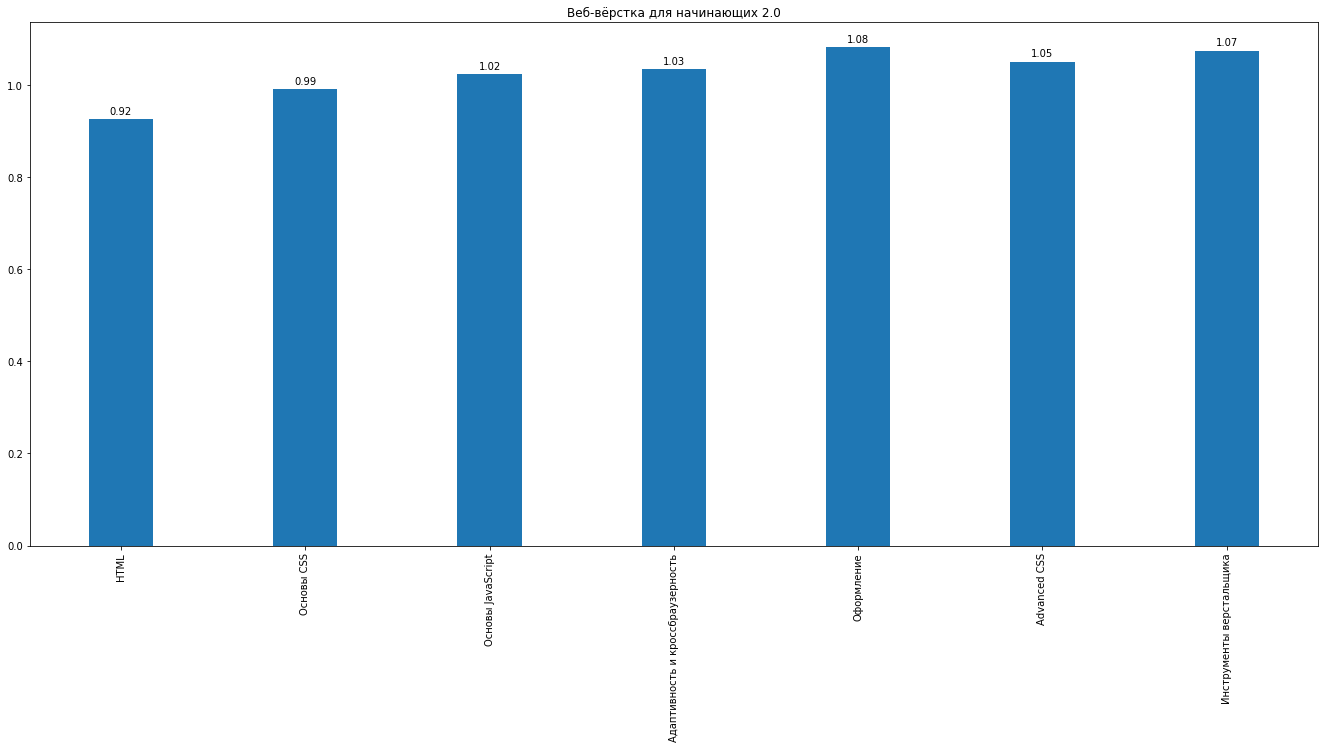

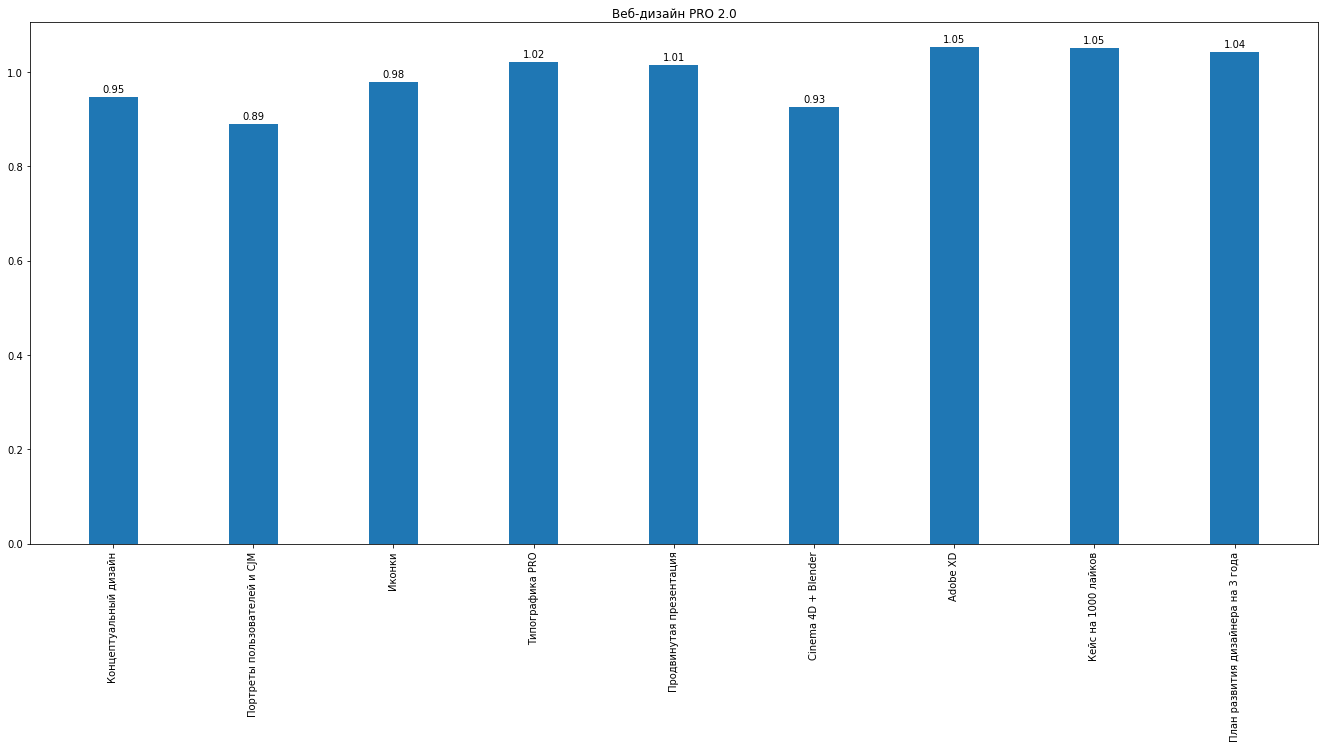

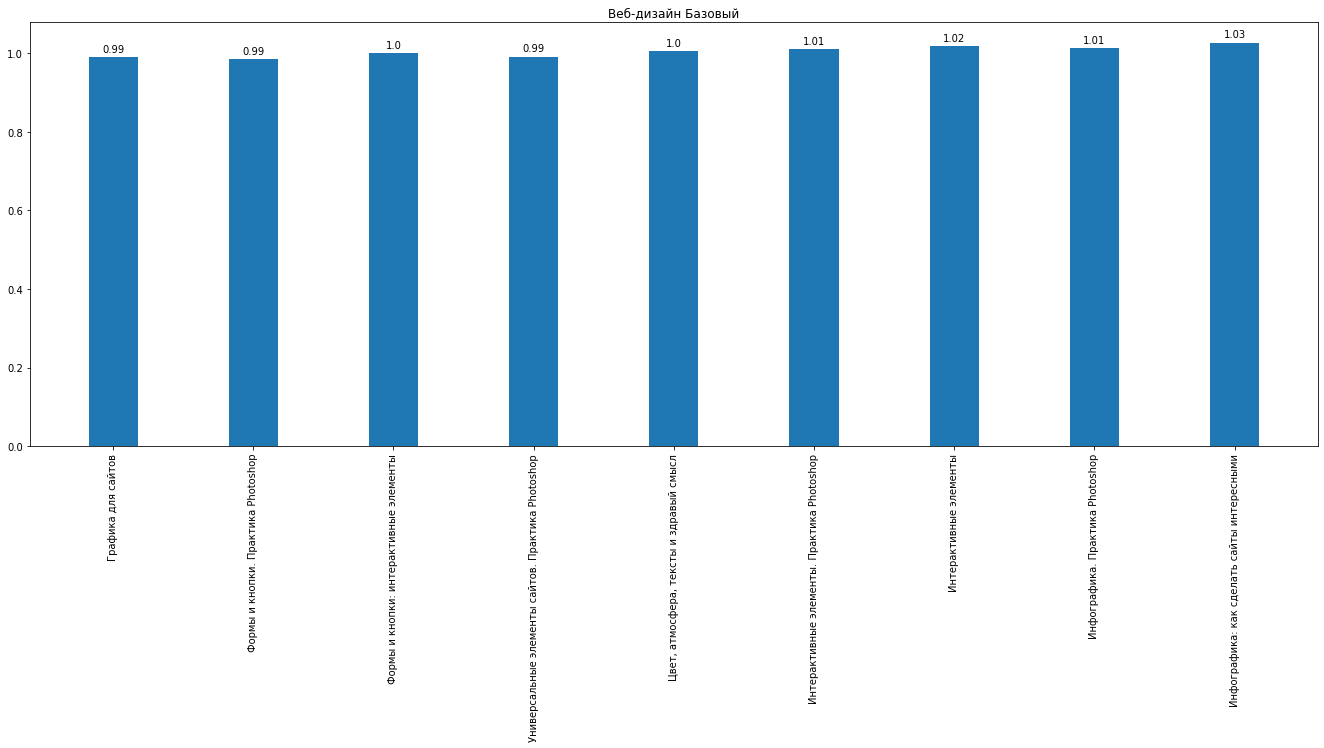

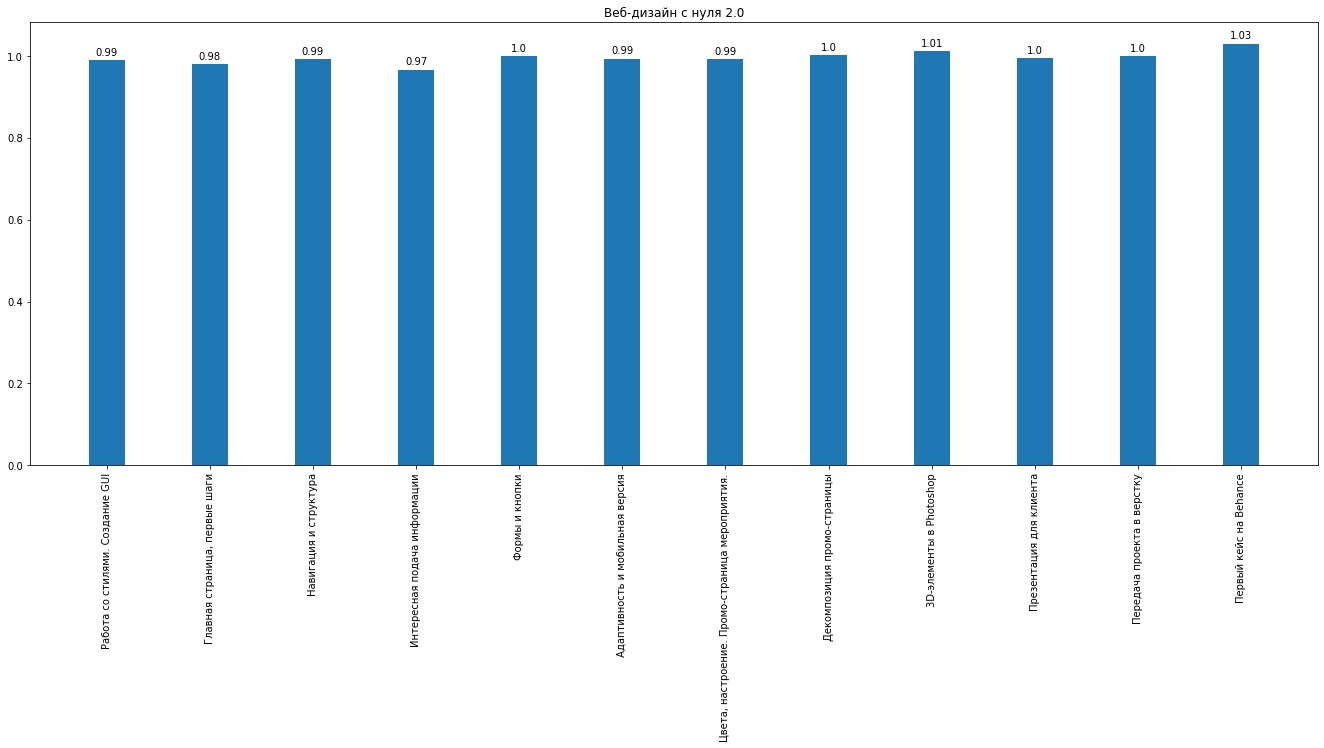

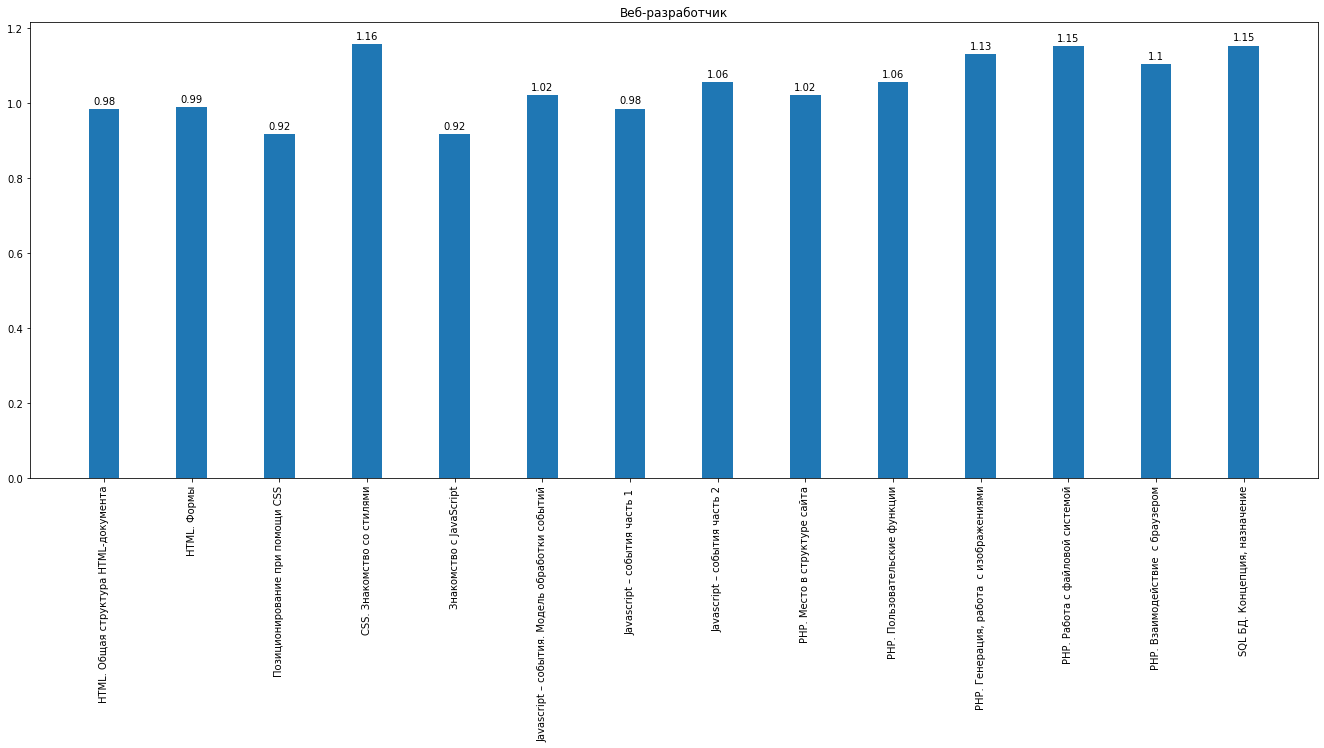

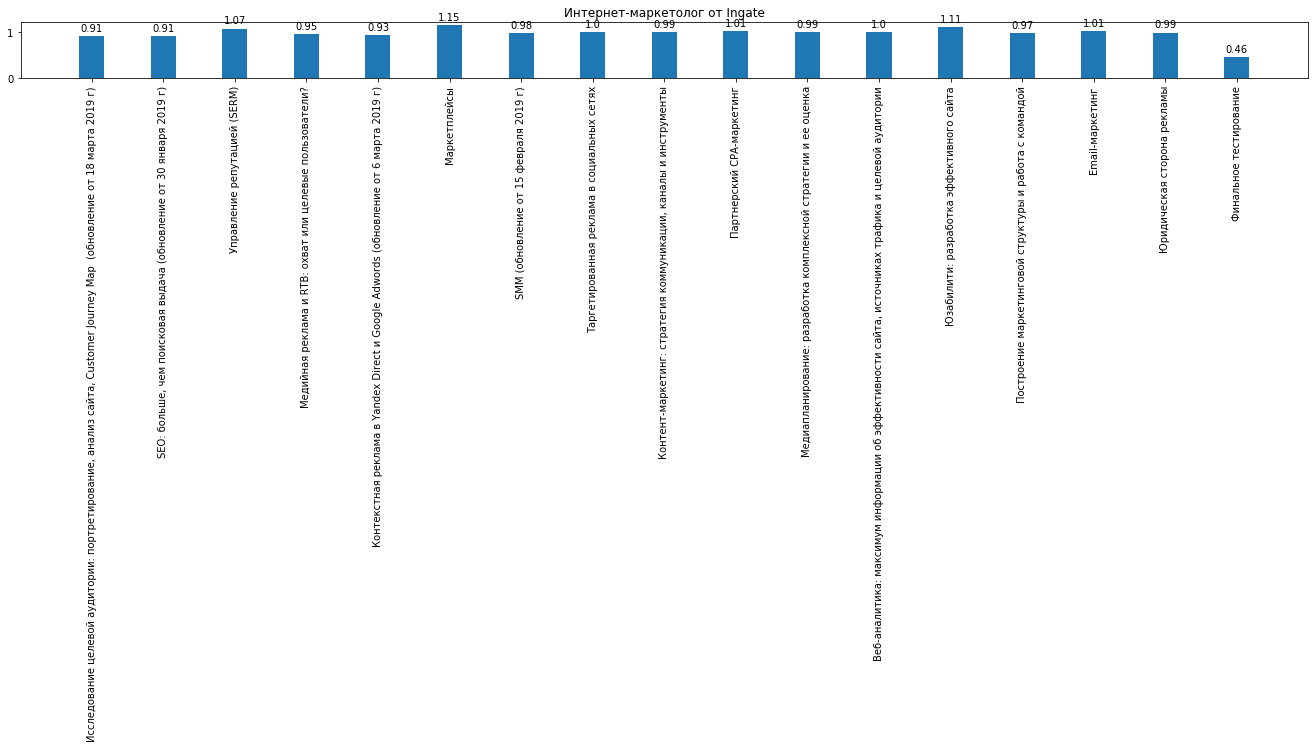

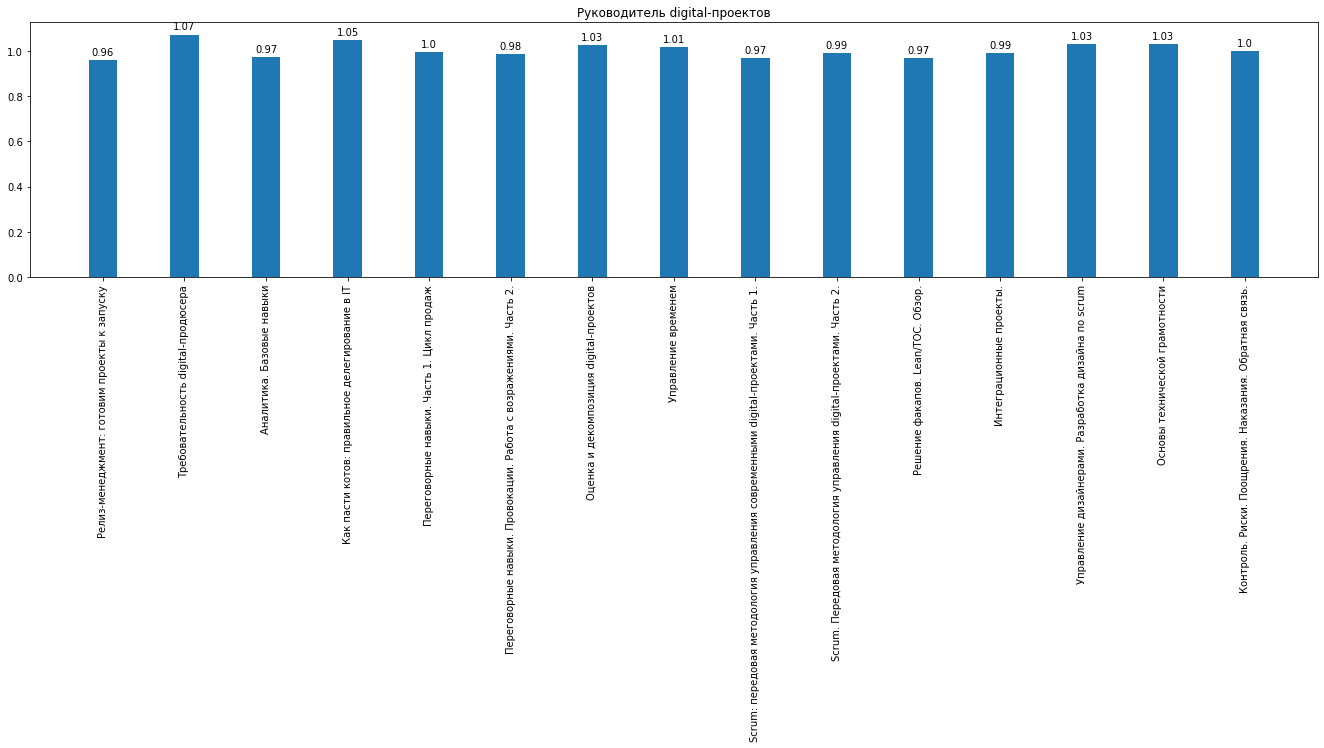

In [33]:
print('4.2 Графики конверсии переходов студентов между модулями на каждом курсе')

# Ширина столбцов
width = 0.35

#Готовим данные
#соберем перечень курсов
courses= []
course_title= ''
for row in df_conv.iterrows():
    if course_title!= row[1][0]:
        course_title= row[1][0]
        courses.append(course_title)
    #if


for item in courses: 

    df= df_conv[df_conv['course_title']== item]
    
    course_field= df['course_field'].iloc[:1].values[0]

    #Строим график
    x_labels = df['module_title']
    y_values = df['conversion']

    #Расположение подписей
    x_values = np.arange(len(x_labels))

    fig, ax = plt.subplots()

    rects = ax.bar(x_values, y_values, width)
    fig.set_size_inches(18.5, 10.5)

    #Добавление подписей на график
    ax.set_title(item)
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_labels)

    #Разворачиваем подписи
    plt.xticks(rotation= 90)

    #Устанавливаем подписи значений над каждым столбцом
    for rect in rects:
        r_height = rect.get_height()
        ax.annotate('{}'.format(round(r_height, 2)),
        xy=(rect.get_x() + rect.get_width() / 2, r_height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom')



    fig.tight_layout()

    plt.show()
#for

4.3 Графики конверсий переходов студентов между модулями по курсам


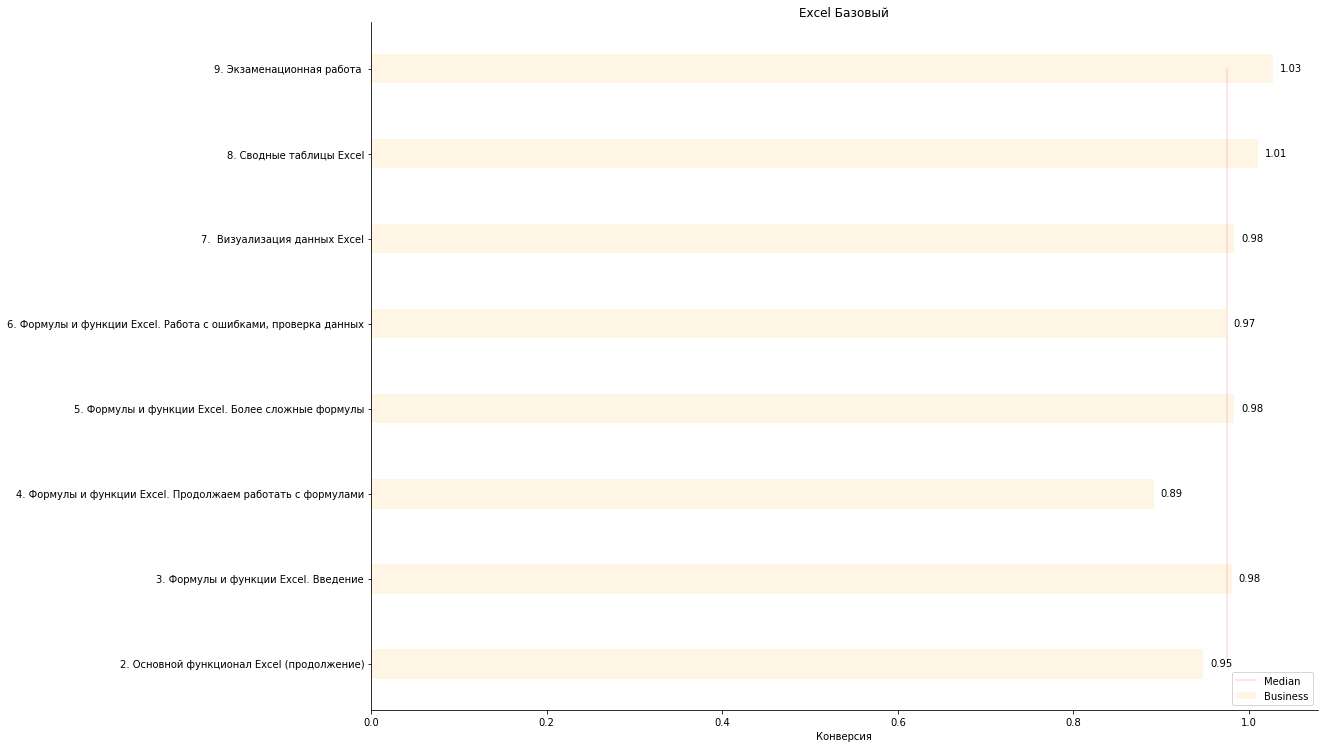

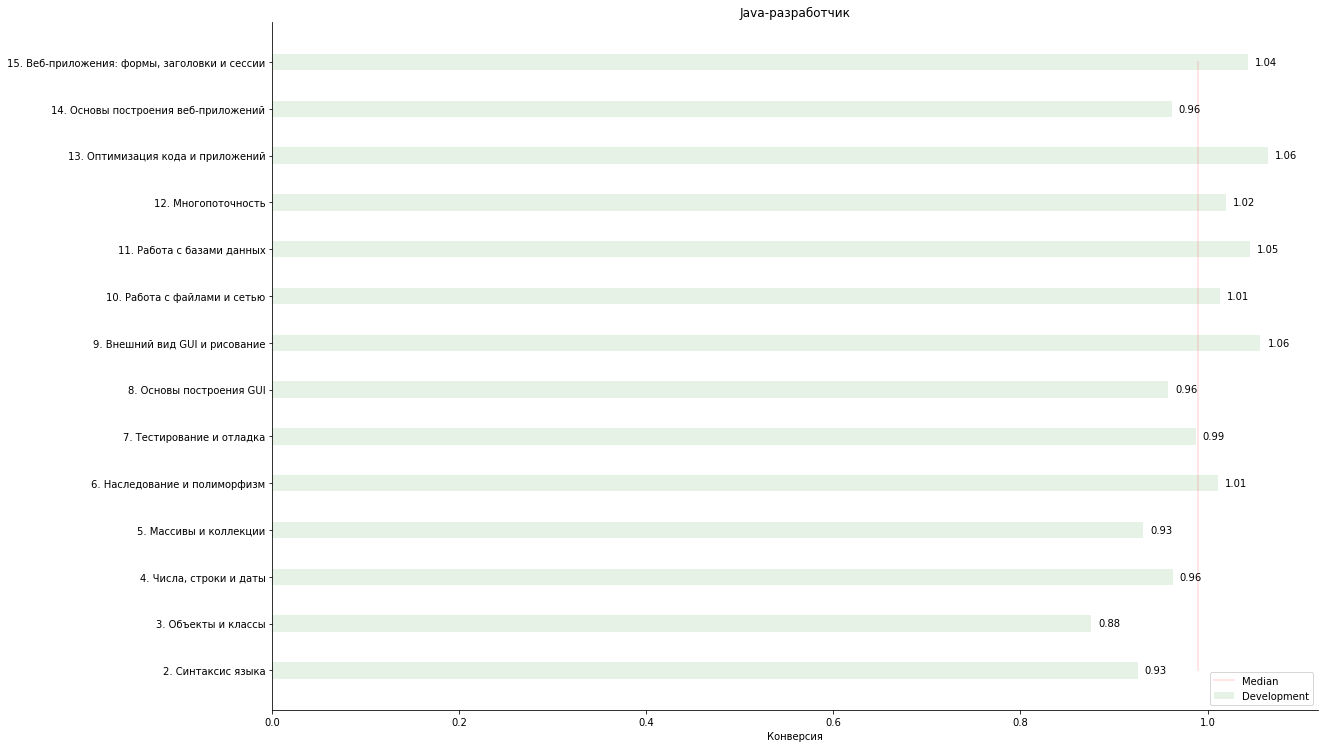

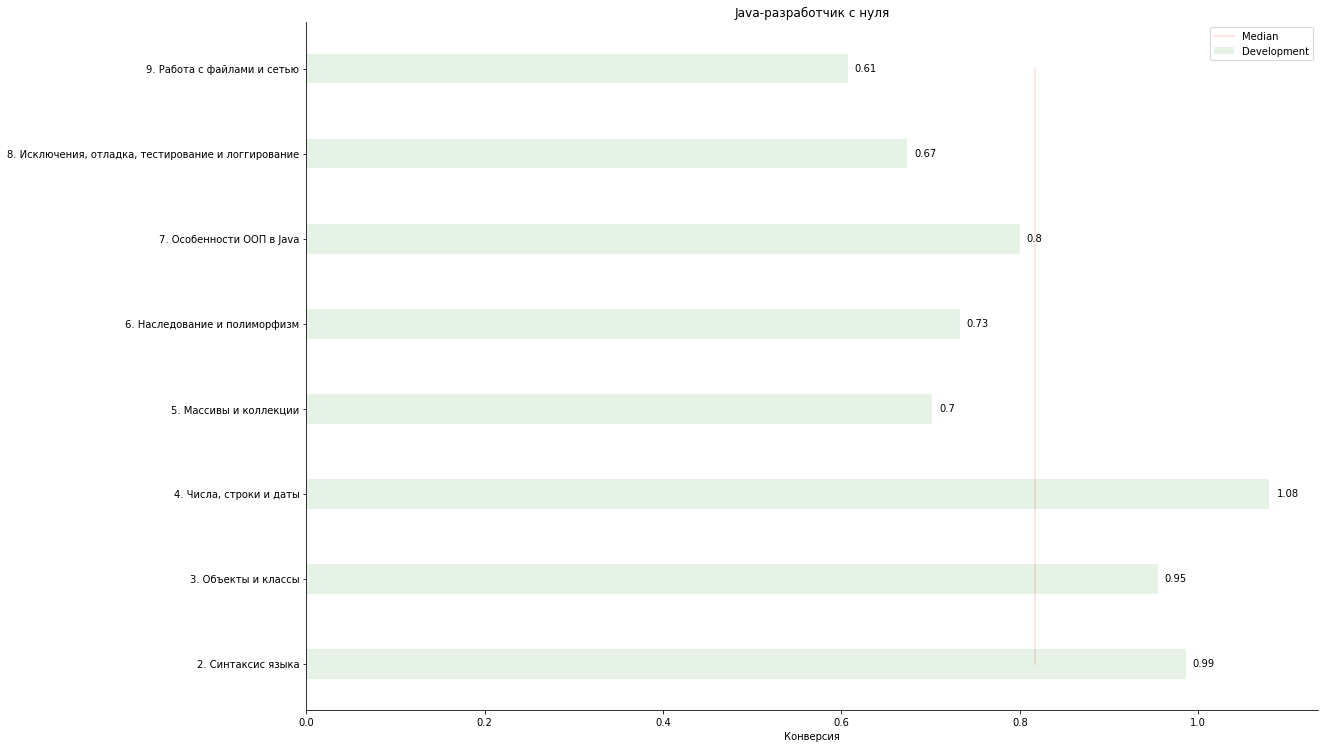

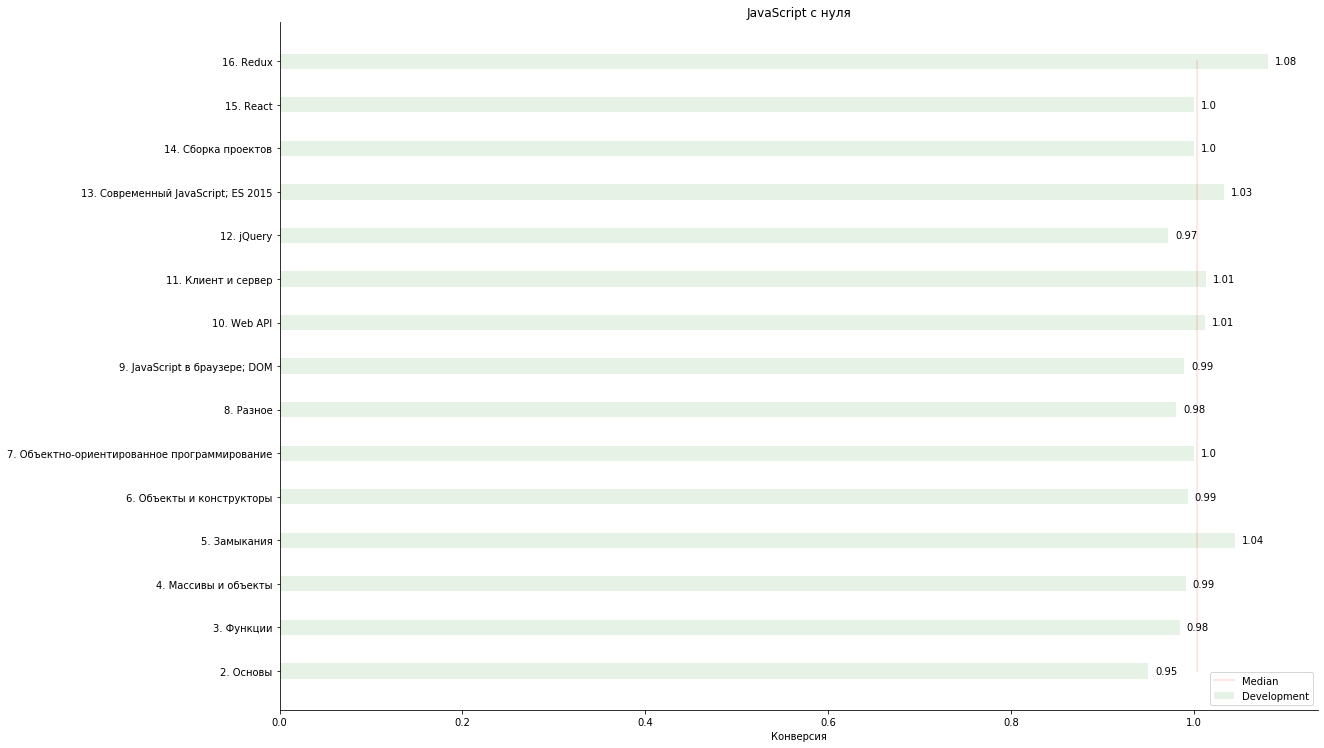

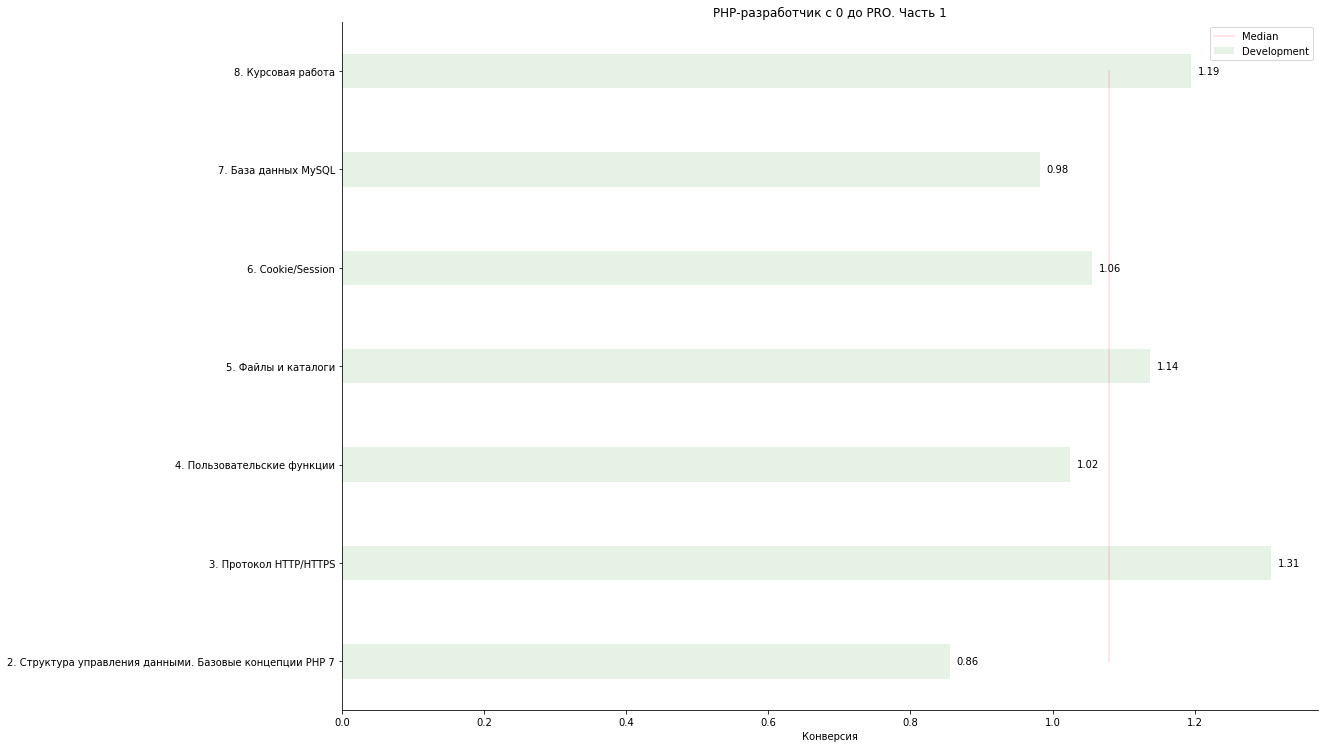

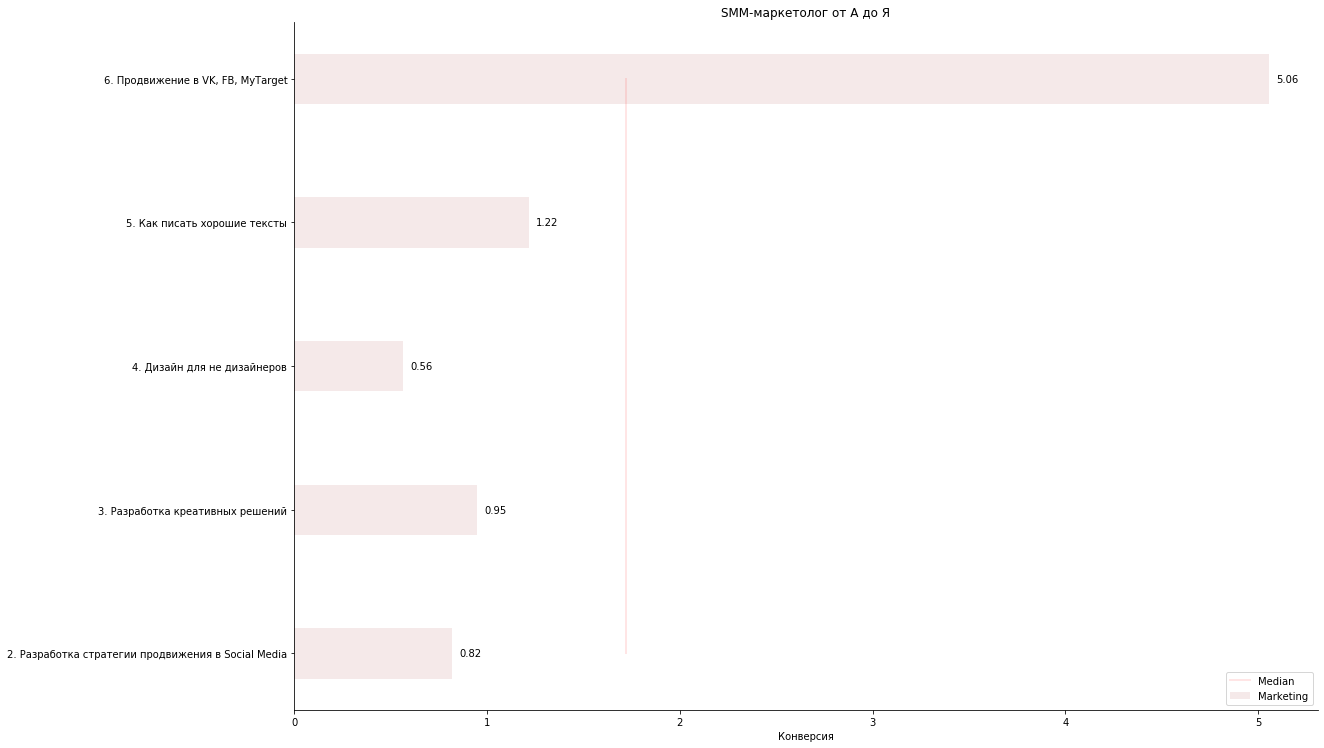

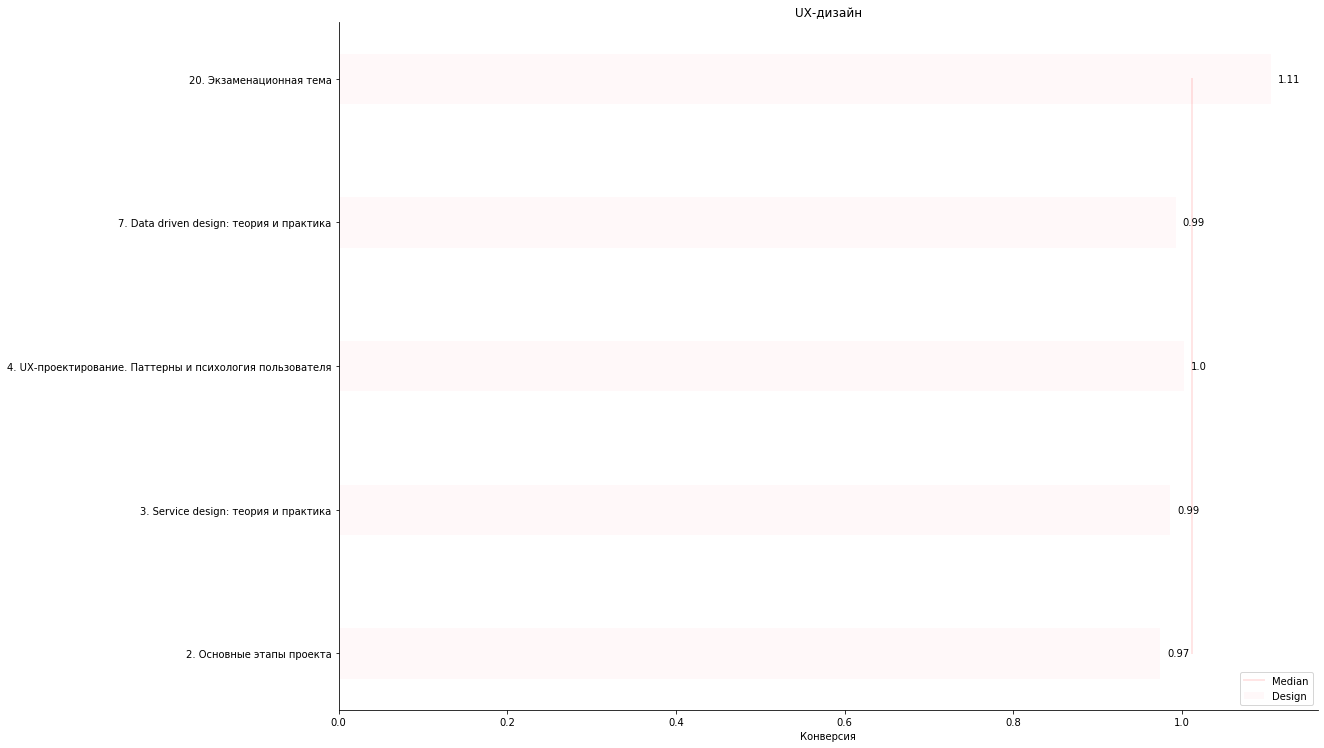

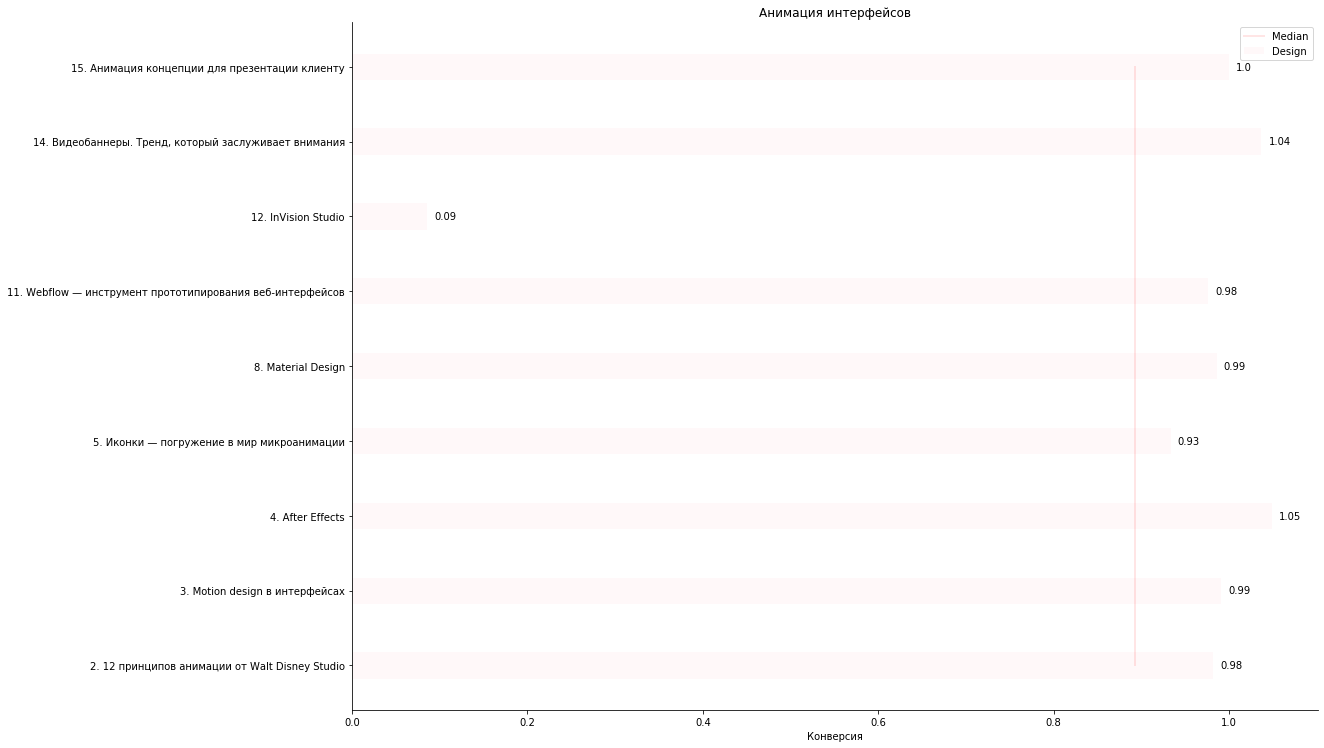

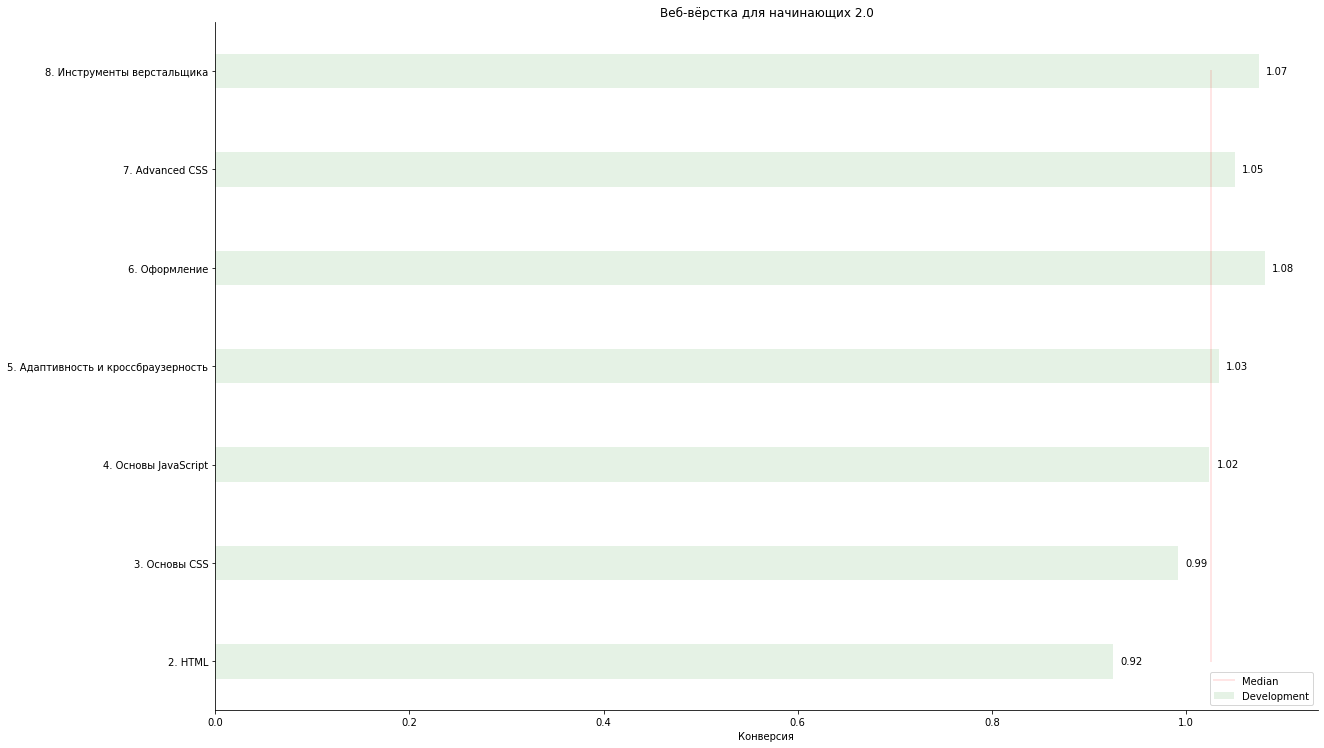

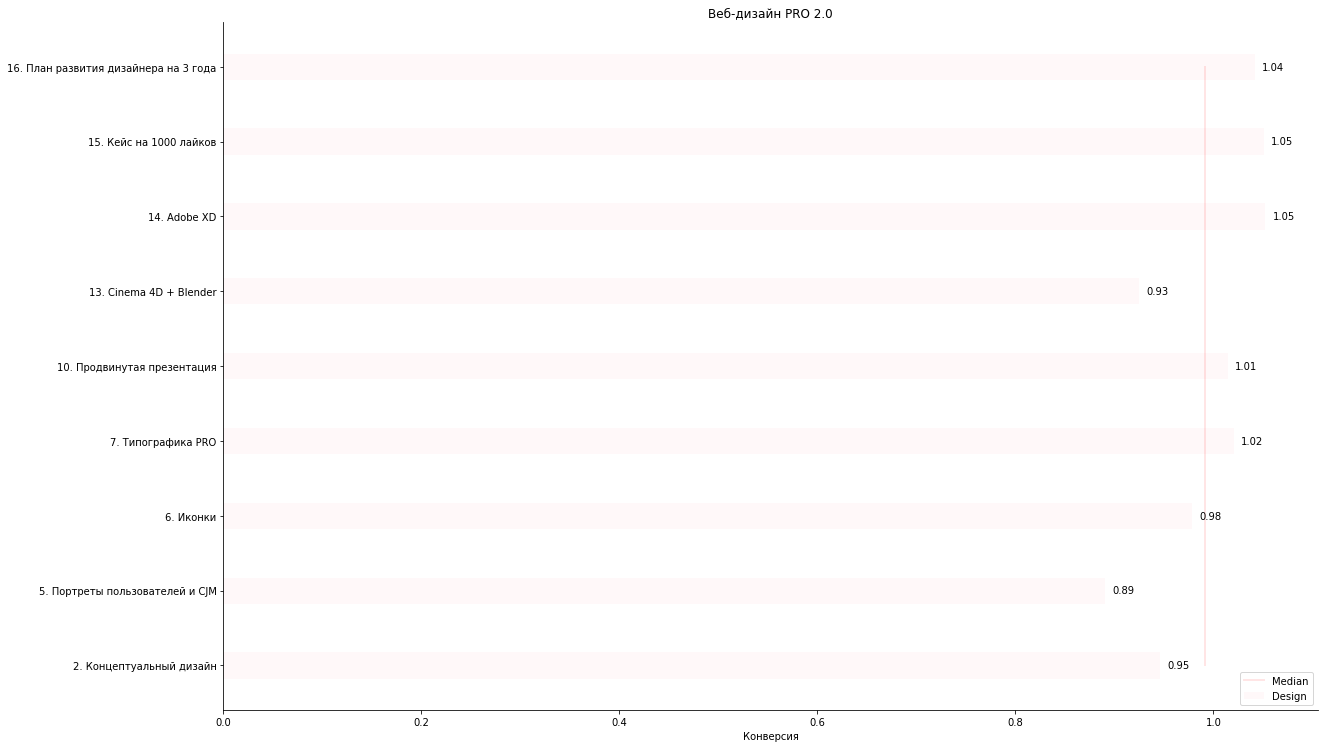

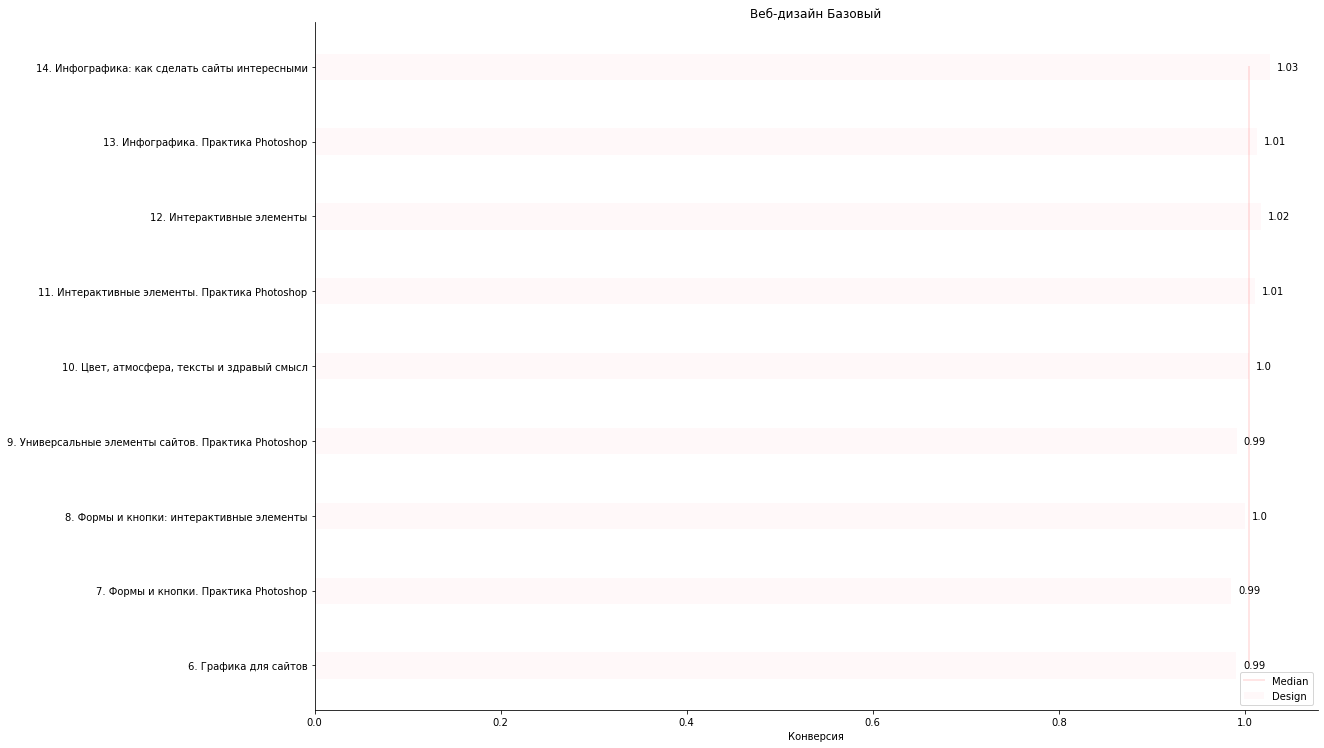

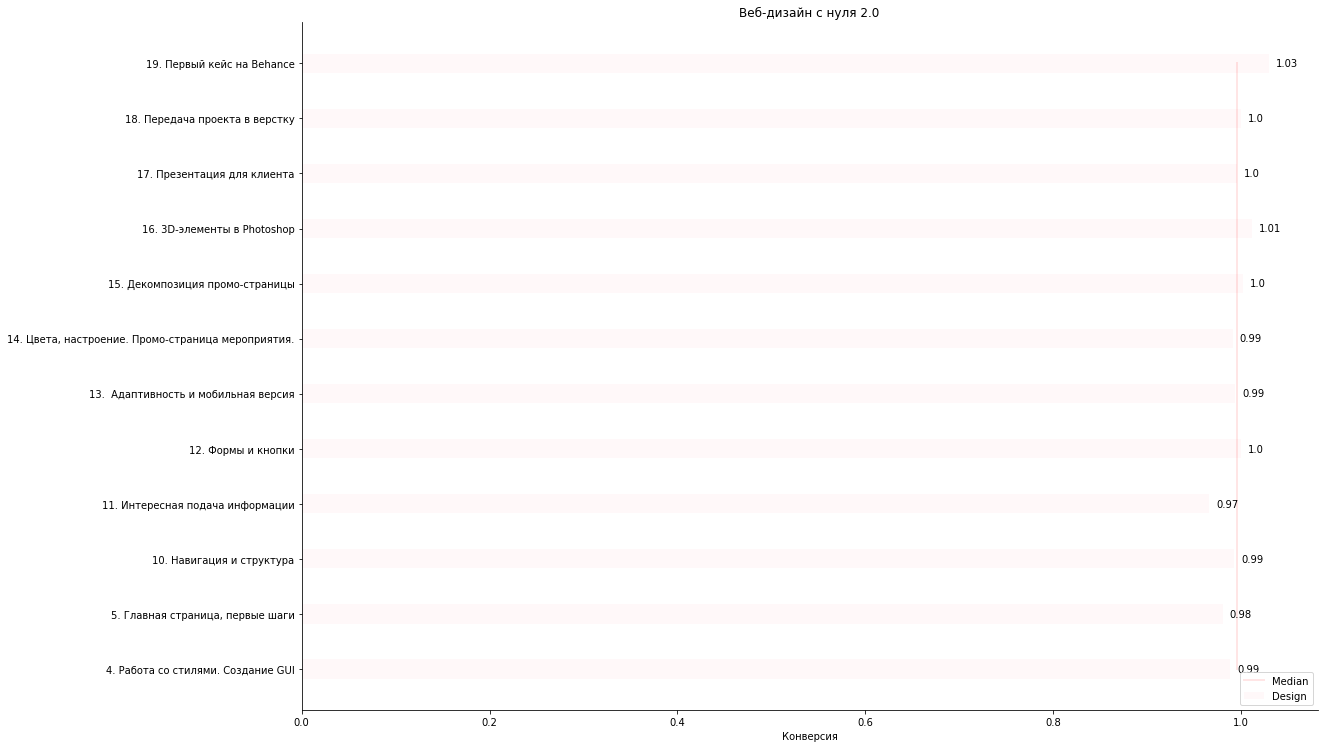

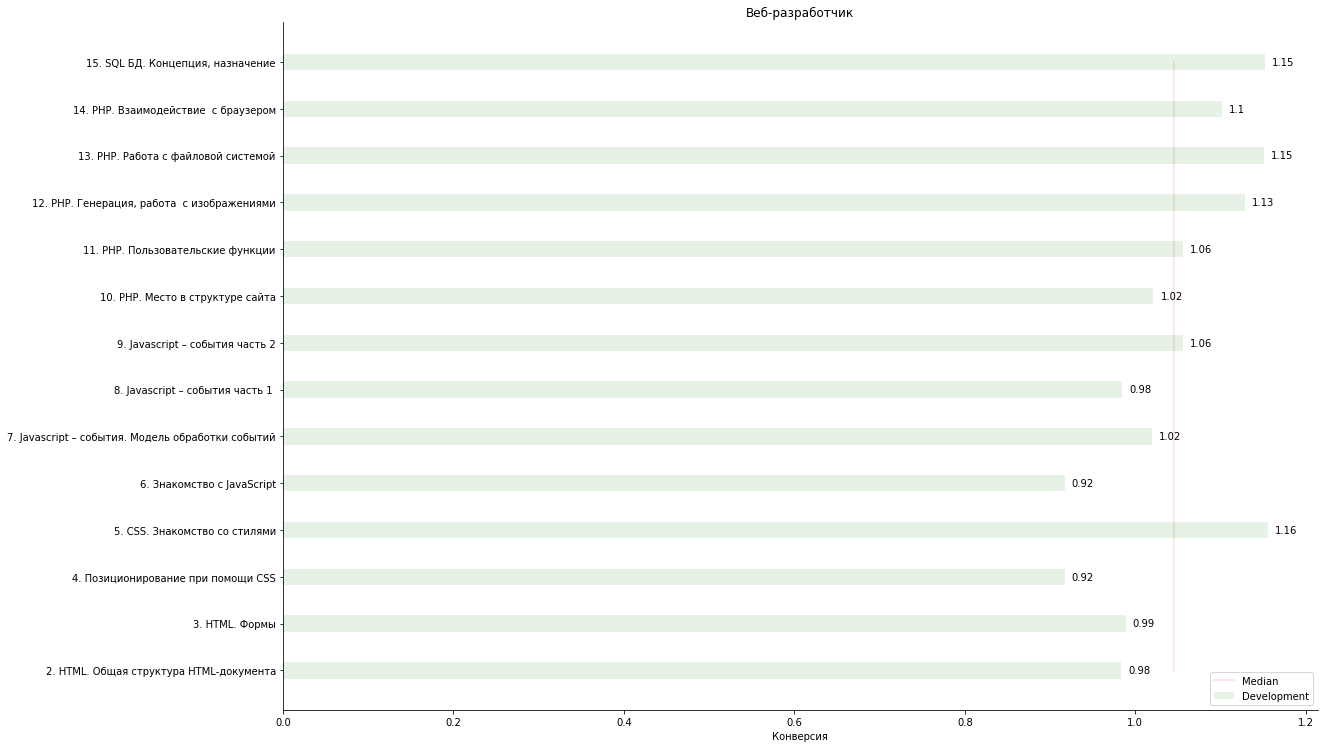

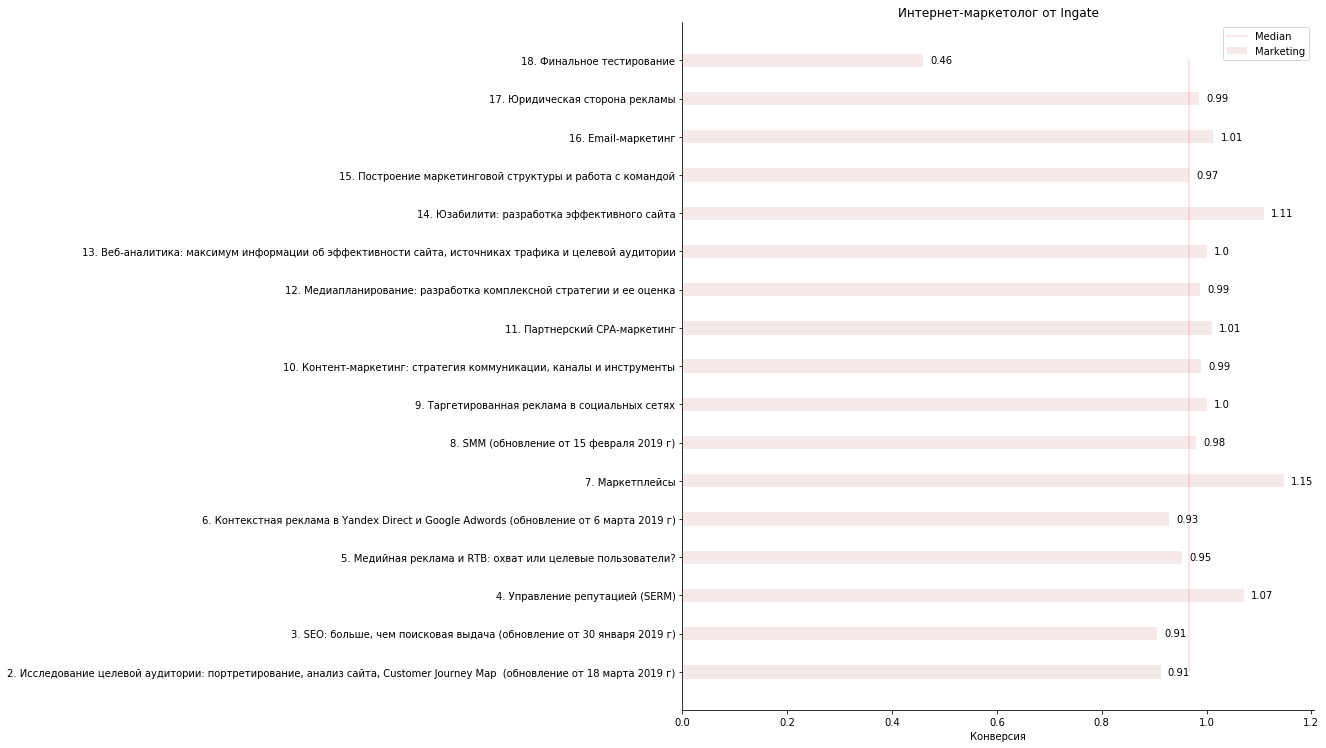

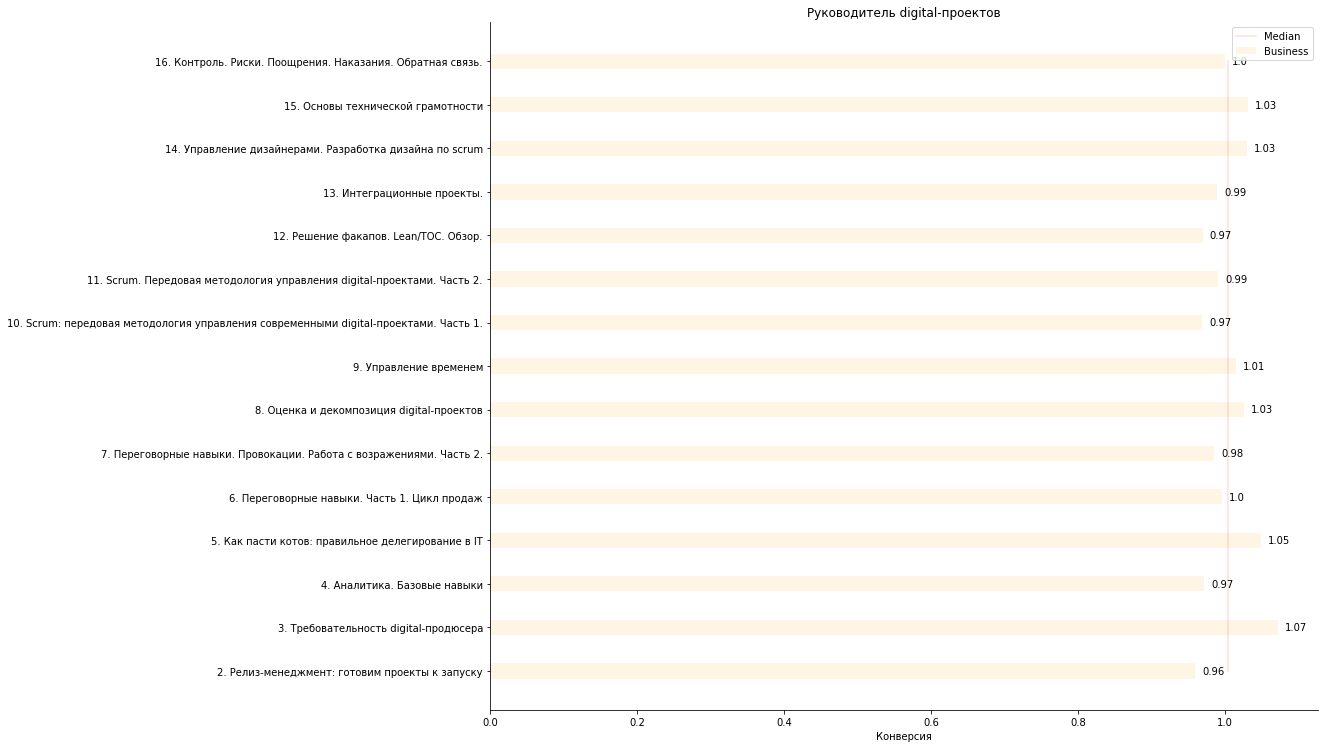

In [34]:
print('4.3 Графики конверсий переходов студентов между модулями по курсам')

# Ширина столбцов
width = 0.35
# Прозрачность
alpha_level= 0.1

#Готовим данные
#соберем перечень курсов
courses= []
course_title= ''
for row in df_conv.iterrows():
    if course_title!= row[1][0]:
        course_title= row[1][0]
        courses.append(course_title)
    #if


for item in courses: 

    df= df_conv[df_conv['course_title']== item]

    #Вычисляем медианное количество студентов на всех курсах
    med= df['conversion'].agg('mean')
    
    course_field= df['course_field'].iloc[:1].values[0]

    #Строим график
    x_labels = df.loc[:,['module_number', 'module_title']].apply((lambda x: str(x[0])+'. '+x[1]), axis=1)
    y_values = df['conversion']

    #Расположение подписей
    x_values = np.arange(len(x_labels))

    fig, ax = plt.subplots()

    #Добавляем столбцы с количеством студентов на график
    rects= ax.barh(x_values, y_values, width, color= field_color_dict.get(course_field), label= course_field, alpha= alpha_level)

    #Добавляем медиану на график
    ax.plot([med, med], [0, max(x_values)], linewidth=2, label= 'Мedian', color='red', alpha= alpha_level)

    # Добавление подписей на график
    ax.set_xlabel('Конверсия')
    ax.set_title(item)
    ax.set_yticks(x_values)
    ax.set_yticklabels(x_labels)
    ax.legend()
               
    #убираем лишние рамки
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    #устанавливаем размер графика
    fig.set_size_inches(18.5, 10.5)

    #Устанавливаем подписи значений 
    for rect in rects:
        r_width = rect.get_width()
        ax.annotate('{}'.format(round(r_width, 2)),
                    xy=(r_width, rect.get_y() + rect.get_height() / 2),
                    xytext=(7, 0),
                    textcoords="offset points",
                    ha='left', va='center')

    fig.tight_layout()
    plt.show()
#for

## Заключение

В данном разделе был проведен анализ конверсии переходов студентов между модулями на каждом курсе, в п. 4.1 представлены результаты расчета.
В п. 4.2 и 4.3 представлены графики конверсии переходов студентов между модулями для каждого курса. По результатам анализа графиков можно сделать следующие выводы:
 * На многих модулях конверсия превышает 1, что говорит о том, что количество студентов, начинающих домашнее задание, часто превышает количество завершивших задание в предыдущем модуле. Это может говорить о том, что студенты часто "перескакивают" между модулями 
 * На курсах **Интернет-маркетолог от Ingate** и **Java-разработчик с нуля** низкая конверсия на последнем модуле, что может говорить о том, что не все студенты успешно прошли курс
 * На курсах **SMM-маркетолог от А до Я** — наблюдается низкая конверсия, ниже медианного значения, а также высокая конверсия у последнего модуля с итоговой работой курса, что может говорить о о том, что студены которые успешно дошли до конца курса, почти в полном составе переходят к выполнению итоговой работе на курсе.



## 5. Метрика успеваемости 

Иногда студенты берут курсы, которые оказываются для них "неподъемными". Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. В данном разделе определяется метрика успиваемости студентов.

In [26]:
#выберем нужные данные из основного датафрейма
df= main_df[['course_title','student_id','start_date', 'finish_date']][(main_df['is_homework'])&(main_df['status']=='done')].sort_values(['course_title', 'student_id'])

#рассчитаем время выполнения в месяцах
def calc_runtime_months (p_start, p_finish):
    '''Рассчет времени в часах между p_start и p_finish'''
    
    delta= dt.strptime(p_finish[:19], '%Y-%m-%d %H:%M:%S') - dt.strptime(p_start[:19], '%Y-%m-%d %H:%M:%S')
    return round(delta.days/30, 2)

df['run_time_m']= df.loc[:,['finish_date', 'start_date']].apply((lambda x: (calc_runtime_months(x[1], x[0]))), axis=1)

df= df[['course_title', 'student_id', 'run_time_m']][df['run_time_m']> 3]

print ('5.1 Определим студентов на каждом курсе, у которых разница между началом и окончанием выполнения домашнего задания больше 3-х месяцев:')

df

5.1 Определим студентов на каждом курсе, у которых разница между началом и окончанием выполнения домашнего задания больше 3-х месяцев:


,course_title,student_id,run_time_m
74827,Excel Базовый,06c5c2a0752b8fe89cf76b3cb7dac347,4.77
169062,Excel Базовый,13797e6274a74eecc9a0f3e962fa1399,4.90
85230,Excel Базовый,3a86afae2246b3b81d8c8cdeb4d06b34,10.90
306303,Excel Базовый,44638f2eb49af321dc9a6042a02efdbf,3.20
271719,Excel Базовый,58982b4f04ebe21c46347a1e8ebd8321,5.83
...,...,...,...
214940,Руководитель digital-проектов,f2a2377ffad4e82b4c2fd29991a83df4,3.57
62628,Руководитель digital-проектов,f330a360d44365bbf0c3bce70740efba,4.10
310159,Руководитель digital-проектов,f51a8650f6d23d1334186eb27bd30013,3.27
234945,Руководитель digital-проектов,f8521a4d2aeeda73b2147153619b5996,3.93


У данных студентов, скорее всего, проблема с подготовкой, т.к. по результатам пункта 3 мы знаем, что в среднем время выполнение домашнего задания по каждому курсу меньше одного месяца

In [27]:
#Подготовим данные для графика
df= df.groupby('course_title').agg('nunique')

Text(0.5, 1.0, 'Количество студентов с врменем выполнения домашней работы более 3-х месяцев')

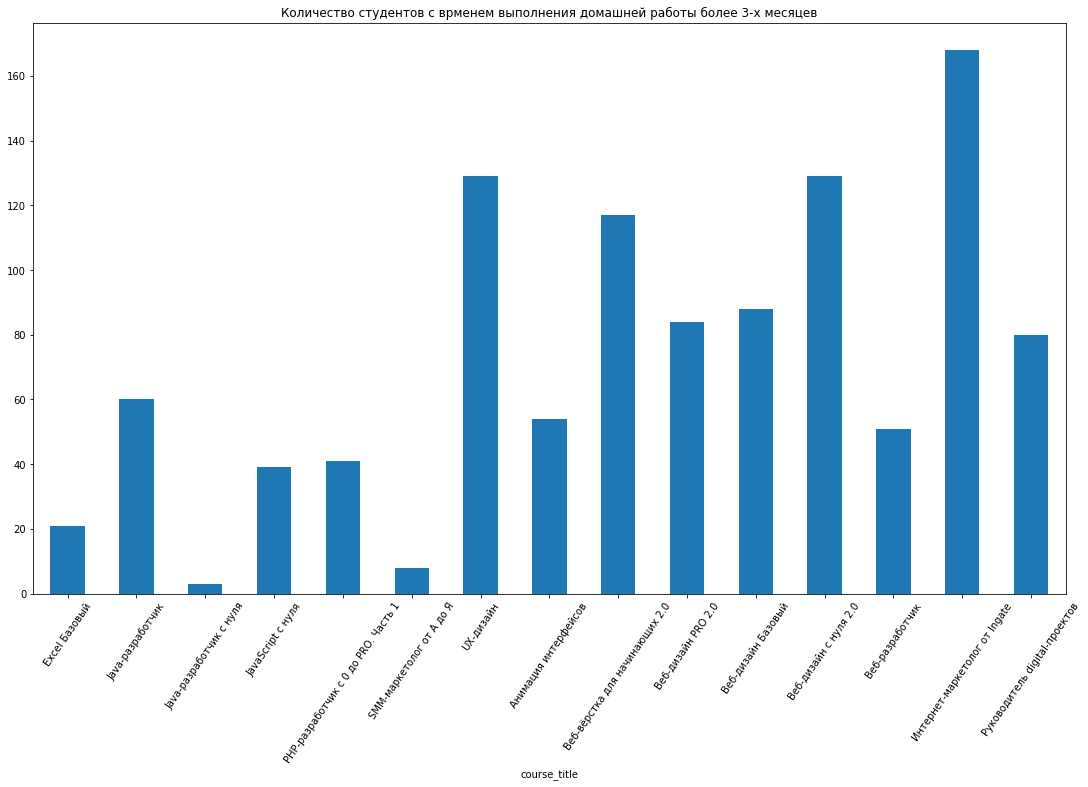

In [28]:

#Рисуем график
ax = df.plot.bar(y='student_id', rot=55, figsize=(18.5, 10.5), legend= False)
ax.set_title('Количество студентов с врменем выполнения домашней работы более 3-х месяцев')

Из графика видно, что наибольшее количество "прооблемных" студентов на курсе **Интернет-маркетолог от Ingate**, а наименьшее на курсе **"Java-разработчик c нуля"**

In [29]:
print('5.2 Посчитаем студентов, у которых минимальная разница между прогрессами больше 3 месяцев, такая низкая активность может говорить о низкой мативации')

#выберем нужные данные из основного датафрейма
df= main_df[['course_title', 'progress_id','student_id','start_date']].sort_values(['course_title', 'progress_id','start_date'])


add_rows= {}
index= 0
prev_index= -1
for row in df.iterrows():
    if prev_index== -1:
        prev_index= row[0]
        continue
    #if
        
    row_prev= df.loc[prev_index]
    
    if (row_prev[0]!= row[1][0])&(row_prev[1]!= row[1][1]):
        prev_index= row[0]
        continue
    #if

    add_rows[index]= {'course_title': row[1][0], 
                                      'student_id': row[1][2], 
                                      'progress_delta': calc_runtime_months(row_prev[3], row[1][3])}
        
    index= index + 1
    prev_index= row[0]
#for

df_activity= pd.DataFrame.from_dict(add_rows, "index")
df_activity

#df

5.2 Посчитаем студентов, у которых минимальная разница между прогрессами больше 3 месяцев, такая низкая активность может говорить о низкой мативации


,course_title,student_id,progress_delta
0,Excel Базовый,4f35c198f990ca0f8096e1efc8661195,1.60
1,Excel Базовый,ed8b0236e5e48814afb721772305442c,-0.63
2,Excel Базовый,ed8b0236e5e48814afb721772305442c,0.00
3,Excel Базовый,ed8b0236e5e48814afb721772305442c,0.00
4,Excel Базовый,ed8b0236e5e48814afb721772305442c,0.00
...,...,...,...
350657,Руководитель digital-проектов,8646f5cf853a8794095ced08450ba49b,0.00
350658,Руководитель digital-проектов,8646f5cf853a8794095ced08450ba49b,0.00
350659,Руководитель digital-проектов,8646f5cf853a8794095ced08450ba49b,0.00
350660,Руководитель digital-проектов,8646f5cf853a8794095ced08450ba49b,0.00


In [30]:
df= df_activity[df_activity['progress_delta']> 3]

df

,course_title,student_id,progress_delta
101,Excel Базовый,beca552b7c5392c40c10d4ca5d70238b,4.90
156,Excel Базовый,caee6ea8366e4040109d78ee661e5dd6,7.90
200,Excel Базовый,36c35f7d4f7b1dd459b056f0ab1fe645,8.97
250,Excel Базовый,358bcbb9c4149c96c8673222976ba401,5.43
357,Excel Базовый,deb8864cc3834c5ed743818dc940cf86,3.20
...,...,...,...
350297,Руководитель digital-проектов,f0cf7c5cfa22671400990f5a87473010,3.10
350407,Руководитель digital-проектов,eda357f91a627a6fb0c784b588e06a6e,8.67
350493,Руководитель digital-проектов,871c975841c3bd1ad6fe06a711915b08,3.43
350536,Руководитель digital-проектов,535fab1dc1bc608c77551b1948ad190c,4.10


In [31]:
# Рассмотрим полученные результаты на графике

#Подготовим данные для графика
df= df.groupby('course_title').agg('nunique')
df

,course_title,student_id,progress_delta
course_title,,,
Excel Базовый,1,220,135
Java-разработчик,1,212,132
Java-разработчик c нуля,1,22,16
JavaScript с нуля,1,303,156
PHP-разработчик с 0 до PRO. Часть 1,1,265,160
SMM-маркетолог от А до Я,1,88,67
UX-дизайн,1,468,237
Анимация интерфейсов,1,210,135
Веб-вёрстка для начинающих 2.0,1,662,240


Text(0.5, 1.0, 'Количество студентов с врменем выполнения домашней работы более 3-х месяцев')

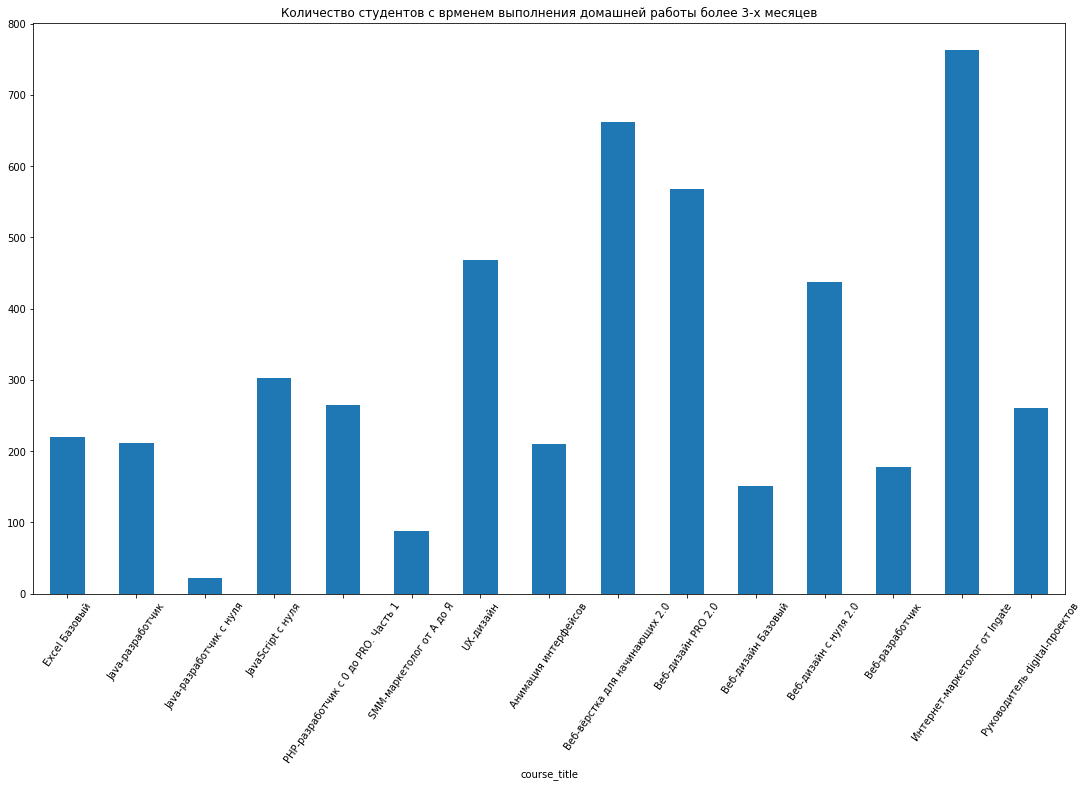

In [32]:
ax = df.plot.bar(y='student_id', rot=55, figsize=(18.5, 10.5), legend= False)
ax.set_title('Количество студентов с врменем выполнения домашней работы более 3-х месяцев')

Из графика видно, что, как и в п. 5.1 наибольшее количество "проблемных" студентов на курсе **Интернет-маркетолог от Ingate**, а наименьшее на курсе **Java-разработчик c нуля**